# Natural Language Processing with Classification and Vector Spaces

Notas sobre o curso Natural Language Processing with Classification and Vector Spaces da DeeplearninigAI. O notebook é composto majoritariamente de material original, mas também possui material da **Deep Learning AI**, como figuras e algumas explicações "Readings" das Lectures.

# Week 1 - Sentiment Analysis With Logistic Regression

## Objetivos de aprendizagem
- Sentiment analysis
- Logistic regression
- Data pre-processing
- Calculating word frequencies
- Feature extraction
- Vocabulary creation
- Supervised learning

## Supervised ML and Sentiment Analysis

Os algoritmos de **Machine Learning (ML)** supervisionados são um tipo de algoritmo que aprende a partir de dados rotulados, ou seja, dados que já possuem um rótulo ou uma classificação pré-definida. Esses algoritmos usam esses dados rotulados para aprender a fazer previsões ou classificações em novos dados.

Na área de Processamento de Linguagem Natural (NLP), os algoritmos de ML supervisionados são usados para uma variedade de tarefas, como classificação de sentimentos, identificação de entidades nomeadas, análise de tópicos, tradução automática, entre outras.

Um exemplo de como esses algoritmos são usados em NLP é na classificação de sentimentos em textos. Nesse caso, um modelo de ML supervisionado seria **treinado em um conjunto de dados rotulados** que contém textos e suas respectivas classificações de sentimento (por exemplo, positivo, negativo ou neutro). O algoritmo usaria esses dados para **aprender a reconhecer padrões nos textos** e, em seguida, aplicaria esses padrões para **classificar o sentimento em novos textos**.

Outro exemplo é na identificação de **entidades nomeadas (NER)**, que é uma tarefa que envolve a identificação de nomes de pessoas, locais, organizações e outras entidades em um texto. Nesse caso, um modelo de ML supervisionado seria treinado em um conjunto de dados rotulados que contém textos e suas respectivas entidades nomeadas. O algoritmo usaria esses dados para aprender a reconhecer os padrões de palavras e contextos que indicam a presença de uma entidade nomeada em um texto, e, em seguida, aplicaria esses padrões para identificar entidades em novos textos.

Em resumo, os algoritmos de ML supervisionados são uma técnica poderosa para resolver problemas em NLP, permitindo que modelos aprendam com dados rotulados e possam fazer previsões ou classificações em novos dados com base no que foi aprendido.

<img src="./imgs/supervised_ml.png">

Um pipeline básico para a _task_ de análise de sentimento (classificação) geralmente envolve as etapas de:
- **Pré-processamento de texto**: Esta etapa envolve a limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.
- **Criação de features**: Nesta etapa, são criadas as features que serão usadas pelo modelo de classificação. As features podem incluir a contagem de palavras, a frequência de palavras, o tipo de palavras, o uso de negação, entre outras.
- **Treinamento do modelo**: O modelo de classificação é treinado em um conjunto de dados rotulados que contêm exemplos de texto e suas respectivas classificações de sentimento. Existem vários algoritmos de aprendizado de máquina que podem ser usados para treinar um modelo, como Árvores de Decisão, Naive Bayes, Regressão Logística, SVM, Redes Neurais, etc.
- **Avaliação do modelo**: Após o treinamento, o modelo é avaliado em um conjunto de dados de teste para verificar sua precisão. É comum dividir o conjunto de dados em conjunto de treinamento, validação e teste.
- **Implantação**: Finalmente, o modelo treinado é usado para classificar o sentimento de novos textos. Novos textos passam pelas mesmas etapas de pré-processamento e criação de features, e o modelo treinado é usado para prever a classificação de sentimento do texto.

## Vocabulary and Feature Extraction

Para representar textos de forma numérica, primeiro precisamos construir um vocabulário, com eles poderemos _encodar_ qualquer texto como um array de números. Um Vocabulário é uma lista com palavras únicas, não repetidas.

Uma forma simples de extrair features do texto é usando o vocabulário, verificando cada palavra do vocabulário que aparece no texto. Caso as palavras no texto que estamos extraindo a feature tenham apareca no vocabulário, atribuímos o valor 1 para ela, e zero para as palavras que do vocabulário que não aparecem no texto. Assim, estamos representando o texto usando [**one-hot encoding**](https://k3ybladewielder.medium.com/introdu%C3%A7%C3%A3o-%C3%A0-nlp-4d7d98b9a36a) ou representação esparsa. Mas esse método pode ser problemático porquê o número de features é igual ao número de palavras no vocabulário e a grande maioria das features serão zero, aumentando excessivamente o tempo de treino e predição dos modelos.

<img src="./imgs/vocabulary_and_feature_extraction.png">

Existem diversas técnicas para representar textos como vetores, sendo as mais comuns a Bag of Words (BoW) e a Representação Distribuída de Palavras (Word Embeddings). Vou explicar brevemente cada uma delas:
- **Bag of Words (BoW)**: Nessa técnica, o texto é representado como um vetor contendo a contagem de ocorrências de cada palavra presente no texto. Cada palavra é considerada como uma dimensão do vetor. Dessa forma, quanto mais vezes uma palavra aparecer no texto, maior será o valor correspondente na dimensão correspondente no vetor. Por exemplo, se um texto contém as palavras "gato", "cão" e "casa", a representação BoW seria um vetor com três dimensões, com valores correspondentes à contagem de ocorrências de cada palavra no texto.
- **Word Embeddings**: Essa técnica é baseada em modelos de linguagem neural, que mapeiam cada palavra em um espaço vetorial de alta dimensão, onde palavras semelhantes têm representações próximas. A ideia é que cada palavra seja representada por um vetor de números reais que captura seu significado semântico. Esses vetores podem ser aprendidos a partir de grandes quantidades de textos usando técnicas de aprendizado de máquina, como Word2Vec, GloVe ou FastText. Os vetores resultantes podem ser usados para representar cada palavra em um texto como um vetor numérico. A representação distribuída de palavras pode capturar relações semânticas entre palavras, como sinonímia e antonímia, e pode ser usada para tarefas mais complexas, como análise de sentimento ou classificação de texto.

Ambas as técnicas são amplamente utilizadas em NLP, dependendo do objetivo e do contexto da tarefa em questão. A escolha da técnica de representação de texto pode influenciar significativamente o desempenho do modelo de aprendizado de máquina, e é importante escolher a técnica mais adequada para a tarefa específica.

Tanto a técnica de Bag of Words (BoW) quanto a Word Embeddings têm seus **pontos fortes e fracos**, e a escolha de qual usar depende do contexto e do objetivo da tarefa em questão.

A representação **BoW** pode ser uma escolha adequada para **tarefas simples de classificação de texto**, como classificação de spam ou análise de sentimento, onde a presença ou ausência de palavras específicas pode ser um indicador importante para a classificação. Além disso, a representação **BoW é computacionalmente eficiente e fácil de interpretar**, o que pode ser uma vantagem para problemas onde a transparência do modelo é importante. No entanto, a representação **BoW não leva em consideração a ordem das palavras no texto, o que pode limitar sua capacidade de capturar nuances semânticas.**

Já Word Embedding é mais adequada para **tarefas que envolvem análise semântica**, como tradução automática, classificação de tópicos ou análise de sentimento baseada em frases complexas. A representação Word Embedding **leva em consideração a ordem e o contexto das palavras**, e **pode capturar a similaridade semântica entre palavras que não aparecem juntas com frequência**. Além disso, a representação distribuída de palavras **pode ser usada para inicializar redes neurais em tarefas de aprendizado profundo**, melhorando o desempenho do modelo. No entanto, Word Embedding **pode ser computacionalmente intensiva e requer grandes quantidades de dados de treinamento para obter bons resultados**.

## Feature Extraction with Frequencies

Numa task de classificação de sentimentos, podemos identificar as palavras positivas e negativas a partir da frequencia de ocorrencia em que elas ocorrem nos textos positivos e negativos. Usando essa contagem, podemos extrair features e usá-las no modelo de classificação, como a **regressão logística**. 

<img src="./imgs/tweet_corpus.png">

A partir da contagem da frequencia das palavras em cada classe, chegamos a essa tabela. Na prática, essa tabela será um dicionário que mapeia a classe da palavra e sua frequência de ocorrência.

<img src="./imgs/word_freq_tweets.png">

Podemos representar essa tabela de frequencia com um array com 3 features, aumentando a velocidade na implementação, porquê em vez de termos v features, teremos apenas 3 para que o modelo aprenda. 

Aqui, a primeira feature é um bias, depois o somatório das palavras da label positiva e o somatório das palavras da label negativa. Assim, teremos o novo vetor com 3 features.

<img src="./imgs/vector_3.png">

<img src="./imgs/feature_extraction.png">

Essa abordagem apesar de ser bem simples é genial, e tem as seguintes vantagens:

1. **Simplicidade e Interpretabilidade:**
   * A técnica é relativamente simples de implementar e entender, mesmo para aqueles sem profundo conhecimento em machine learning.
   * A utilização de frequências de palavras como características facilita a interpretação dos resultados, pois permite identificar quais palavras positivas e negativas contribuem mais para a classificação de um tweet.

2. **Eficiência:**
   * A extração de frequências de palavras é computacionalmente eficiente, especialmente quando comparada a métodos mais complexos de representação textual, como modelos neurais.
   * Isso torna a abordagem adequada para datasets grandes e para implementações em tempo real.

3. **Robustez:**
   * A abordagem é robusta a ruídos e faltas de dados, pois se baseia na contagem de palavras, que é menos sensível a pequenas alterações no texto do que outros métodos.
   * Isso a torna útil para lidar com tweets curtos ou com erros ortográficos.

4. **Flexibilidade:**
   * A técnica pode ser facilmente adaptada para outras tarefas de classificação binária de texto, como detecção de spam ou análise de opiniões.
   * Basta ajustar o conjunto de palavras positivas e negativas de acordo com o contexto da tarefa.

5. **Desempenho:**
   * Apesar da simplicidade, a modelagem com frequências de palavras pode alcançar resultados competitivos em comparação com métodos mais complexos, especialmente para datasets com boa distribuição de classes.

Mas ela também possui suas limitações, como:
1. **Falta de Consideração da Ordem das Palavras:** A abordagem não leva em conta a ordem das palavras no tweet, o que pode ser importante para capturar o sentimento.
2. **Sensibilidade a Sinônimos e Sarcasmo:** A técnica pode não capturar bem o sentimento de tweets que utilizam sinônimos para expressar sentimentos positivos ou negativos, ou que empregam sarcasmo.
3. **Desempenho Inferior em Textos Complexos:** Para textos longos e complexos, a simples contagem de palavras pode não ser suficiente para capturar nuances do sentimento.

Ainda assim, é um ótimo baseline, e caso seja necessário, podemos escalar para abordagens mais complexas.

In [1]:
import pandas as pd

# Exemplo de tweets e seus respectivos sentimentos
tweets = [
    ("Eu amo o meu cachorro", "positivo"),
    ("Eu odeio acordar cedo", "negativo"),
    ("A comida deste restaurante é incrível", "positivo"),
    ("Estou cansado de estudar", "negativo"),
    ("Que dia lindo para passear no parque", "positivo"),
    ("O filme que vi ontem foi excelente", "positivo"),
    ("Não vejo a hora de encontrar meus amigos", "positivo"),
    ("Estou muito feliz com os resultados", "positivo"),
    ("Que tristeza ver essa notícia", "negativo"),
    ("Estou decepcionado com o serviço dessa empresa", "negativo"),
    ("A chuva estragou meu dia", "negativo"),
    ("Fiquei surpreso com o presente que recebi", "positivo"),
    ("Esse livro é incrível, não consigo parar de ler", "positivo"),
    ("Estou preocupado com o futuro do país", "negativo"),
    ("Adorei o novo restaurante que experimentei", "positivo"),
    ("O trânsito está terrível hoje", "negativo"),
    ("Essa música me faz sentir feliz", "positivo"),
    ("Perdi o ônibus e vou me atrasar para o trabalho", "negativo"),
    ("Estou ansioso para o feriado chegar", "positivo"),
    ("Que vergonha, esqueci meu aniversário de casamento", "negativo"),
    ("Fui promovido no trabalho, estou radiante", "positivo"),
    ("Não suporto essa pessoa, ela é muito arrogante", "negativo"),
    ("O jantar que preparei ficou delicioso", "positivo"),
    ("Meu time perdeu o jogo, estou arrasado", "negativo"),
    ("Que saudade de casa", "negativo"),
    ("Estou animado para o final de semana", "positivo"),
    ("Esse filme é terrível, não recomendo", "negativo"),
    ("A festa de aniversário foi um sucesso", "positivo"),
    ("Estou cansado de tanto trabalhar", "negativo"),
    ("Que alívio, finalmente terminei meu projeto", "positivo"),
    ("Esse lugar é incrível, preciso voltar mais vezes", "positivo"),
    ("Perdi meu voo e agora estou preso no aeroporto", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não aguento mais essa situação", "negativo"),
    ("O passeio de barco foi maravilhoso", "positivo"),
    ("Estou preocupado com a saúde dos meus pais", "negativo"),
    ("Adorei a nova série que comecei a assistir", "positivo"),
    ("Não vejo a hora de começar minhas férias", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Ganhei um prêmio, estou emocionado", "positivo"),
    ("Esse restaurante não vale o preço que cobram", "negativo"),
    ("Estou apaixonado por essa música", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Meu cachorro está doente, estou preocupado", "negativo"),
    ("Adorei o presente que ganhei de aniversário", "positivo"),
    ("Estou cansado de tanto estudar para as provas", "negativo"),
    ("Que alegria, hoje é meu aniversário", "positivo"),
    ("Não vejo a hora de conhecer meu sobrinho que está a caminho", "positivo"),
    ("Estou frustrado com o atraso no projeto", "negativo"),
    ("Que bom ver meus amigos depois de tanto tempo", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("O pôr do sol na praia é magnífico", "positivo"),
    ("Estou triste com a perda do meu animal de estimação", "negativo"),
    ("Que maravilha, vou me formar na faculdade", "positivo"),
    ("Estou desanimado com o futuro da economia", "negativo"),
    ("O concerto de música clássica foi incrível", "positivo"),
    ("Não suporto mais essa discussão", "negativo"),
    ("Estou feliz por ter começado a fazer exercícios", "positivo"),
    ("O tráfego está caótico hoje", "negativo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("Esse filme me deixou emocionado", "positivo"),
    ("Estou decepcionado com o resultado da eleição", "negativo"),
    ("Que bom encontrar você aqui", "positivo"),
    ("Não gostei do sabor desse prato", "negativo"),
    ("Estou contente por ter conhecido novas pessoas", "positivo"),
    ("Estou estressado com o excesso de trabalho", "negativo"),
    ("Essa viagem foi incrível, quero repetir", "positivo"),
    ("Não aguento mais a rotina cansativa", "negativo"),
    ("Estou preocupado com a segurança da minha cidade", "negativo"),
    ("Que felicidade, consegui uma promoção no trabalho", "positivo"),
    ("Não gosto desse clima frio", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Estou triste com a partida do meu amigo", "negativo"),
    ("Adorei o show que fui ontem à noite", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Que alegria, vou passar as férias na praia", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Que bom estar de volta em casa", "positivo"),
    ("Não suporto mais esse barulho", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Estou preocupado com o meio ambiente", "negativo"),
    ("Adorei o presente que ganhei de Natal", "positivo"),
    ("Estou frustrado com a demora no atendimento", "negativo"),
    ("Que alívio, consegui resolver o problema", "positivo"),
    ("Não vejo a hora de voltar para casa", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Esse lugar é incrível, não vejo a hora de voltar", "positivo"),
    ("Estou triste por não ter conseguido o emprego", "negativo"),
    ("Estou radiante com a notícia do casamento do meu amigo", "positivo"),
    ("Não aguento mais essa situação difícil", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Adorei a comida desse restaurante", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Não gostei do final desse livro", "negativo"),
    ("Estou contente por ter conseguido resolver o problema", "positivo"),
    ("Estou estressado com os prazos do trabalho", "negativo"),
    ("Que alegria, vou passar o final de semana na praia", "positivo"),
    ("Não vejo a hora de viajar para o exterior", "positivo"),
    ("Estou triste com a notícia da doença de um amigo", "negativo"),
    ("Adorei o filme que assisti ontem à noite", "positivo"),
    ("Estou frustrado com a falta de oportunidades", "negativo"),
    ("Que alívio, consegui encontrar minhas chaves perdidas", "positivo"),
    ("Não suporto mais essa situação complicada", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
    ("Estou preocupado com o meio ambiente", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou radiante com a notícia do casamento do meu amigo", "positivo"),
    ("Não gostei do final desse livro", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Adorei a comida desse restaurante", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Estou ansioso para o final de semana", "positivo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Que bom encontrar você aqui", "positivo"),
    ("Estou decepcionado com o resultado da eleição", "negativo"),
    ("Esse filme me deixou emocionado", "positivo"),
    ("Estou frustrado com o atraso no projeto", "negativo"),
    ("Não vejo a hora de conhecer meu sobrinho que está a caminho", "positivo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("O tráfego está caótico hoje", "negativo"),
    ("Estou feliz por ter começado a fazer exercícios", "positivo"),
    ("Não suporto mais essa discussão", "negativo"),
    ("O concerto de música clássica foi incrível", "positivo"),
    ("Estou desanimado com o futuro da economia", "negativo"),
    ("Que maravilha, vou me formar na faculdade", "positivo"),
    ("Estou triste com a perda do meu animal de estimação", "negativo"),
    ("O pôr do sol na praia é magnífico", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Adorei o show que fui ontem à noite", "positivo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou cansado de tantas brigas", "negativo"),
    ("Estou radiante com a notícia do meu amigo", "positivo"),
    ("Não gostei do resultado do jogo", "negativo"),
    ("Que alegria, vou passar o final de semana na praia", "positivo"),
    ("Estou irritado com o barulho constante", "negativo"),
    ("Estou feliz por ter terminado meus estudos", "positivo"),
    ("Estou preocupado com a saúde da minha família", "negativo"),
    ("Estou encantado com a cultura desse país", "positivo"),
    ("Não consigo parar de pensar naquela situação", "negativo"),
    ("Estou maravilhado com a beleza desse lugar", "positivo"),
    ("Não suporto mais essa situação complicada", "negativo"),
    ("Estou emocionado com o nascimento do meu sobrinho", "positivo"),
    ("Estou irritado com o comportamento dessa pessoa", "negativo"),
    ("Estou feliz por ter encontrado um novo emprego", "positivo"),
    ("Não gostei do atendimento dessa loja", "negativo"),
    ("Que bom te ver depois de tanto tempo", "positivo"),
    ("Estou chateado com o cancelamento do evento", "negativo"),
    ("Estou empolgado para a festa de aniversário", "positivo"),
    ("Não aguento mais essa dor de cabeça", "negativo"),
    ("Estou ansioso para o lançamento do novo filme", "positivo"),
]

# Cria o DataFrame
data = pd.DataFrame(tweets, columns=['tweet', 'label'])
data["label"] = data["label"].map({"positivo": 0, "negativo": 1})
df = data.copy()

In [2]:
df.head()

,tweet,label
0,Eu amo o meu cachorro,0
1,Eu odeio acordar cedo,1
2,A comida deste restaurante é incrível,0
3,Estou cansado de estudar,1
4,Que dia lindo para passear no parque,0


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Exemplo de dataframe de tweets
# data = {'tweet': ['Este é um tweet não tóxico', 
#                   'Este é um tweet tóxico com palavras negativas',
#                   'Outro tweet não tóxico com palavras positivas'],
#         'label': [0, 1, 0]}

# df = pd.DataFrame(data)
positive_words = df[df["label"] == 0]["tweet"].to_list() # Lista de palavras positivas
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["tweet"].to_list()# Lista de palavras negativas
negative_words = word_tokenize(' '.join(negative_words))

# Função para mapear a frequência das palavras do subconjunto de palavras positivas (label = 0)
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

# Função para mapear a frequência das palavras do subconjunto de palavras negativas (label = 1)
def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicar as funções aos tweets e adicionar os resultados ao dataframe
df['bias'] = 1  # Coluna de bias com valor 1
df['pos_freq'] = df['tweet'].apply(positive_words_frequency)
df['neg_freq'] = df['tweet'].apply(negative_words_frequency)
df.head(20)

,tweet,label,bias,pos_freq,neg_freq
0,Eu amo o meu cachorro,0,1,37,33
1,Eu odeio acordar cedo,1,1,0,3
2,A comida deste restaurante é incrível,0,1,51,16
3,Estou cansado de estudar,1,1,30,31
4,Que dia lindo para passear no parque,0,1,31,9
5,O filme que vi ontem foi excelente,0,1,53,28
6,Não vejo a hora de encontrar meus amigos,0,1,82,39
7,Estou muito feliz com os resultados,0,1,33,38
8,Que tristeza ver essa notícia,1,1,24,16
9,Estou decepcionado com o serviço dessa empresa,1,1,40,75


## Preprocessing

O pré-processamento geralmente envolve as etapas de limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.

Exemplo em python:

In [4]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def text_cleaning(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    return tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo e tokenizado!"
tokens = text_cleaning(text)
print(tokens)

['exemplo', 'texto', 'limpo', 'tokenizado']


[nltk_data] Downloading package stopwords to /home/joaoag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# preprocessando o texto
df["ttweet"] = df["tweet"].apply(text_cleaning)
df["ttweet"] = df["ttweet"].apply(lambda x: " ".join(x)) # retornando a lista como string

# novo conjunto de palavras
positive_words = df[df["label"] == 0]["ttweet"].to_list() # Lista de palavras positivas
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["ttweet"].to_list()# Lista de palavras negativas
negative_words = word_tokenize(' '.join(negative_words))

# Função para mapear a frequência das palavras do subconjunto de palavras positivas (label = 0)
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

# Função para mapear a frequência das palavras do subconjunto de palavras negativas (label = 1)
def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())  # Tokenização e conversão para minúsculas
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicar as funções aos tweets e adicionar os resultados ao dataframe
df['bias'] = 1  # Coluna de bias com valor 1
df['pos_freq'] = df['ttweet'].apply(positive_words_frequency)
df['neg_freq'] = df['ttweet'].apply(negative_words_frequency)
df.head(20)

,tweet,label,bias,pos_freq,neg_freq,ttweet
0,Eu amo o meu cachorro,0,1,2,1,amo cachorro
1,Eu odeio acordar cedo,1,1,0,3,odeio acordar cedo
2,A comida deste restaurante é incrível,0,1,15,1,comida deste restaurante incrível
3,Estou cansado de estudar,1,1,0,8,cansado estudar
4,Que dia lindo para passear no parque,0,1,4,1,dia lindo passear parque
5,O filme que vi ontem foi excelente,0,1,13,1,filme vi ontem excelente
6,Não vejo a hora de encontrar meus amigos,0,1,18,2,vejo hora encontrar amigos
7,Estou muito feliz com os resultados,0,1,13,0,feliz resultados
8,Que tristeza ver essa notícia,1,1,11,4,tristeza ver notícia
9,Estou decepcionado com o serviço dessa empresa,1,1,0,13,decepcionado serviço dessa empresa


Mas além disso também podemos fazer **Stemming** e **lematização**. Elas são técnicas de pré-processamento de texto com o objetivo de reduzir as palavras em sua forma base ou raiz, simplificando o processo de análise de texto.

**Stemming** é um processo mais simples e rápido de normalização de palavras, que envolve a remoção de sufixos com o objetivo de transformar uma palavra em sua raiz, ou seja, em sua forma básica. Um exemplo de algoritmo de stemming é o Porter Stemmer, que é amplamente utilizado em NLP. O ponto positivo do stemming é sua simplicidade e velocidade de processamento, o que pode ser útil em projetos com grandes volumes de dados. No entanto, o stemming pode produzir algumas palavras raiz que não são facilmente reconhecidas, o que pode ser um problema em alguns casos.

Já a **lematização** é um processo mais complexo de normalização de palavras, que envolve a análise do contexto da palavra para determinar sua forma básica. A lematização utiliza um dicionário de palavras ou um algoritmo para mapear a palavra para sua forma base. O ponto positivo da lematização é que ela produz palavras que são facilmente reconhecíveis, o que pode ser importante em projetos que exigem maior precisão na análise de texto. No entanto, a lematização é um processo mais lento e computacionalmente mais caro do que o stemming, o que pode ser um problema em projetos com grandes volumes de dados.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

def text_cleaning_s(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza o stemming dos tokens
    stemmer = SnowballStemmer('portuguese')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo, tokenizado e stemmed!"
tokens = text_cleaning_s(text)
print(tokens)

['exempl', 'text', 'limp', 'tokeniz', 'stemmed']


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('wordnet')
nltk.download('omw-1.4')

def text_cleaning_l(text):
    # Extrai as stopwords em inglês
    stopwords_list = stopwords.words('english')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

# Exemplo de uso
# text = "This is an example of text that will be cleaned, tokenized, and lemmatized!"
text = "Este é um exemplo de texto que será limpo, tokenizado e stemmed!"
tokens = text_cleaning_l(text)
print(tokens)

[nltk_data] Downloading package wordnet to /home/joaoag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/joaoag/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['este', 'é', 'um', 'exemplo', 'de', 'texto', 'que', 'será', 'limpo', 'tokenizado', 'e', 'stemmed']


## Logistic Regression Overview

A **regressão logística** é frequentemente utilizada em análise de sentimento porque é um algoritmo de classificação simples, rápido e eficiente para problemas de classificação binária, ou seja, quando há apenas duas classes, como positivo e negativo. Além disso, a regressão logística é facilmente interpretável, o que significa que é possível entender como o modelo chegou a uma determinada previsão.

Outra vantagem da regressão logística é que ela lida bem com problemas de dados desbalanceados, que é comum em análise de sentimento, onde muitas vezes há mais exemplos de uma classe do que outra. A regressão logística usa uma função sigmoide para calcular as probabilidades de cada classe, e essa função é bem adequada para casos de classes desbalanceadas.

Outro motivo para a popularidade da regressão logística em análise de sentimento é que ela é relativamente fácil de implementar e ajustar. É possível utilizar diferentes técnicas de regularização, como a regularização L1 ou L2, para evitar overfitting e melhorar o desempenho do modelo.

No entanto, é importante ressaltar que a regressão logística pode não ser adequada para problemas de classificação multiclasse, ou seja, quando há mais de duas classes, como em análise de tópicos. Nesses casos, outros algoritmos, como Árvores de Decisão, SVMs ou Redes Neurais, podem ser mais apropriados.

<img src="./imgs/logistic_regression.png">

O modelo é treinado usando um conjunto de dados rotulados, onde cada texto é rotulado como tendo um sentimento positivo ou negativo. O objetivo do treinamento é ajustar os parâmetros do modelo para que ele possa fazer previsões precisas em novos dados.

Durante o treinamento, o modelo utiliza a função logística para calcular a probabilidade de um texto ter um sentimento positivo ou negativo com base em seus vetores de características. A função logística produz um valor entre 0 e 1, que representa a probabilidade de um texto ter um sentimento positivo. Se a probabilidade for maior que 0,5, o modelo classifica o texto como tendo um sentimento positivo. Caso contrário, o texto é classificado como tendo um sentimento negativo.

Após o treinamento, o modelo pode ser usado para fazer previsões em novos dados. Para cada novo texto, o modelo converte-o em um vetor de características e utiliza a função logística para calcular a probabilidade de ter um sentimento positivo ou negativo. Em seguida, classifica o texto como tendo um sentimento positivo ou negativo com base no valor calculado.

Note que conforme $\theta^T x^{(i)}$ se aproxima cada vez mais de $-\infty$, o denominador da função sigmoidal fica cada vez maior e, como resultado, a sigmoidal se aproxima de $0$. Por outro lado, conforme $\theta^T x^{(i)}$ se aproxima cada vez mais de $\infty$, o denominador da função sigmoidal se aproxima de 1 e, como resultado, a sigmoidal também se aproxima de $1$.

Dado um tweet, podemos transformá-lo em um vetor e passá-lo pela sua função sigmoidal para obter uma previsão da seguinte forma:

<img src="./imgs/logistic_regression2.png">

In [8]:
def text_cleaning_l(text):
    # Extrai as stopwords
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [9]:
# import pandas as pd
# import numpy as np

# # Criação das frases aleatórias
# np.random.seed(42)
# frases = np.random.choice(['Esta é uma frase positiva.',
#                            'Esta é uma frase negativa.'], size=100000)

# # Criação das labels aleatórias
# labels = np.random.choice(['positivo', 'negativo'], size=100000)

# # Criação do DataFrame
# df = pd.DataFrame({'frase': frases, 'label': labels})

# # Visualização das primeiras linhas
# df.head()

In [10]:
df.shape

(172, 6)

<AxesSubplot:>

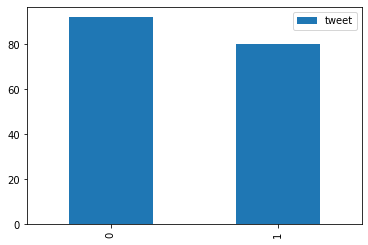

In [11]:
df.groupby('label').agg({'tweet': 'count'}).reset_index(drop=True).plot(kind='bar')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# divisão em treino e teste
X = df[['pos_freq', 'neg_freq']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.9807692307692307
Precisão da classificação (Classe 0): 1.0
Precisão da classificação (Classe 1): 0.9655172413793104


/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
# df['frase_processada'] = df['frase'].apply(text_cleaning_l)
df['ttweet'] = df['tweet'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['ttweet'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.7692307692307693
Precisão da classificação (Classe 0): 0.7142857142857143
Precisão da classificação (Classe 1): 0.8333333333333334


In [14]:
# Mesmo exemplo mas com o TF-IDF como vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
# df['frase_processada'] = df['frase'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = TfidfVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['ttweet'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia da classificação: 0.7115384615384616
Precisão da classificação (Classe 0): 0.6216216216216216
Precisão da classificação (Classe 1): 0.9333333333333333


## Logistic Regression Cost Function

A função de custo da regressão logística é usada para avaliar quão bem um modelo de regressão logística está performando em relação aos dados observados. Ela é frequentemente utilizada em problemas de classificação binária, onde o objetivo é prever se uma observação pertence a uma das duas classes possíveis. Aqui está uma explicação de cada etapa da função de custo da regressão logística:

1. **Hipótese da Regressão Logística:**
   A primeira etapa é a formulação da hipótese do modelo de regressão logística. A hipótese é uma função que mapeia as entradas para uma probabilidade estimada de pertencer a uma das classes. A função logística (também conhecida como função sigmoide) é comumente utilizada como a função de hipótese na regressão logística e é dada pela seguinte equação:

   $$ h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}$$

   Onde:
   - $ h_{\theta}(x) $ é a estimativa da probabilidade de \( x \) pertencer à classe positiva,
   - $ \theta $ são os parâmetros do modelo,
   - $ x $ é o vetor de entrada,
   - $ e $ é o número de Euler (aproximadamente 2.71828).


2. **Função de Custo Logístico:**
   A função de custo é uma medida de quão bem a hipótese do modelo se ajusta aos dados observados. Para a regressão logística, a função de custo (também conhecida como função de perda ou função de erro) é definida usando a técnica de máxima verossimilhança. A função de custo logístico para um único exemplo de treinamento é dada pela seguinte equação:

   $$ J(\theta) = -y \log(h_{\theta}(x)) - (1 - y) \log(1 - h_{\theta}(x)) $$

   Onde:
   - $ J(\theta) $ é a função de custo,
   - $ y $ é a classe verdadeira do exemplo (0 ou 1),
   - $ h_{\theta}(x) $ é a estimativa da probabilidade da classe positiva dada pela hipótese.


3. **Função de Custo Médio (ou Função de Custo Regularizada):**
   Para avaliar o desempenho do modelo em todo o conjunto de dados, a função de custo médio é calculada. Isso é feito tirando a média dos custos individuais de todos os exemplos de treinamento. Além disso, uma penalidade de regularização pode ser adicionada para evitar overfitting. A função de custo médio (ou função de custo regularizada) é dada pela seguinte equação:

   $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $$

   Onde:
   - $ m $ é o número total de exemplos de treinamento,
   - $ n $ é o número de características,
   - $ \lambda $ é o parâmetro de regularização,
   - $ \theta_j $ é o j-ésimo parâmetro do modelo.

# Week 2 - Sentiment Analysis with Naive Bayes

## Objetivos de aprendizagem
- Error analysis
- Naive Bayes inference
- Log likelihood
- Laplacian smoothing
- conditional probabilities
- Bayes rule
- Sentiment analysis
- Vocabulary creation
- Supervised learning

## Recaptulando...

1. **Probabilidade:**
   A probabilidade é uma medida numérica que quantifica a incerteza associada a um evento. Em termos simples, é a chance de que algo aconteça. A probabilidade de um evento é sempre um número entre 0 e 1, onde 0 indica impossibilidade absoluta do evento ocorrer e 1 indica certeza absoluta de que o evento ocorrerá.
   
<img src="./imgs/prob_positive_tweet.png">
<img src="./imgs/prob_positive_tweet2.png">

2. **Probabilidade Condicional:**
   A probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu. É denotada por $ P(A|B) $, que lê-se como "a probabilidade de A dado B". A fórmula para calcular a probabilidade condicional é:

   $$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B,
   - $ P(A \cap B) $ é a probabilidade da interseção de A e B,
   - $ P(B) $ é a probabilidade de B.

   Em palavras simples, a probabilidade condicional é a proporção de vezes que o evento A ocorre quando o evento B ocorre.

<img src="./imgs/conditional_prob_tweet.png">


3. **Regra de Bayes:**
   A regra de Bayes é uma ferramenta fundamental na teoria das probabilidades que permite atualizar as probabilidades de uma hipótese à luz de novas evidências. Formalmente, a regra de Bayes é expressa como:

   $ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B (posterior),
   - $ P(B|A) $ é a probabilidade de B dado A (likelihood),
   - $ P(A) $ é a probabilidade de A (prior),
   - $ P(B) $ é a probabilidade de B.

   A regra de Bayes nos permite calcular a probabilidade de uma hipótese (A) ser verdadeira dada uma evidência observada (B), usando a probabilidade da evidência dada a hipótese (likelihood), a probabilidade a priori da hipótese e a probabilidade marginal da evidência.A diferença principal entre a probabilidade condicional e a regra de Bayes é que a probabilidade condicional é uma medida da probabilidade de um evento ocorrer dado que outro evento já ocorreu, enquanto a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências. A regra de Bayes utiliza a probabilidade condicional como um de seus componentes para calcular a probabilidade posterior.

<img src="./imgs/bayes_rule_tweet.png">

A probabilidade é a chance de um evento ocorrer, a probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu, e a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências.

## Naive Bayes

O algoritmo Naive Bayes é um método de classificação probabilístico baseado no teorema de Bayes, com uma suposição "ingênua" de independência condicional entre os recursos.

1. **Suposição de Independência Condicional:**
   A primeira etapa do algoritmo Naive Bayes é a suposição de independência condicional entre os recursos. Isso significa que assumimos que os recursos são independentes entre si, dado o valor da variável de classe. Apesar de ser uma suposição forte e muitas vezes não ser verdadeira na prática, ela simplifica os cálculos e torna o algoritmo computacionalmente eficiente.

2. **Construção do Modelo de Probabilidade:**
   O próximo passo é construir o modelo de probabilidade. Isso envolve calcular a probabilidade de cada classe e a probabilidade de cada valor do recurso dado cada classe. Em outras palavras, para cada classe, calculamos a probabilidade a priori da classe ( $ P(C_k) $ ) e a probabilidade de cada recurso ( $ P(X_i | C_k) $ ).

3. **Classificação:**
   Depois que o modelo de probabilidade é construído, podemos usá-lo para fazer previsões sobre novos exemplos. Dada uma nova instância com valores de recursos $ x_1, x_2, ..., x_n $, queremos calcular a probabilidade de pertencer a cada classe e, em seguida, atribuir a classe com a maior probabilidade como a classe prevista para a instância. Isso é feito usando o teorema de Bayes:

   $$ P(C_k | x_1, x_2, ..., x_n) = \frac{P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k)}{P(x_1, x_2, ..., x_n)} $$

   Onde:
   - $ P(C_k | x_1, x_2, ..., x_n) $ é a probabilidade da classe $ C_k $ dado os valores dos recursos,
   - $ P(C_k) $ é a probabilidade a priori da classe $ C_k $,
   - $ P(x_i | C_k) $ é a probabilidade de cada valor do recurso dado a classe $ C_k $,
   - $ P(x_1, x_2, ..., x_n) $ é a probabilidade dos valores dos recursos.

4. **Estimação de Parâmetros:**
   Durante a etapa de construção do modelo, precisamos estimar os parâmetros do modelo, ou seja, as probabilidades a priori das classes e as probabilidades condicionais dos recursos para cada classe. Isso geralmente é feito usando técnicas como a frequência relativa de ocorrência dos dados de treinamento.

5. **Suavização de Laplace (Opcional):**
   Em alguns casos, para evitar probabilidades condicionais iguais a zero para recursos não observados em uma classe particular, pode ser aplicada a suavização de Laplace, adicionando uma pequena quantidade aos contadores de frequência de cada valor de recurso para cada classe durante a estimativa dos parâmetros.

Essas são as etapas principais da função do algoritmo Naive Bayes, desde a suposição de independência condicional até a classificação de novas instâncias usando o teorema de Bayes.

## Log Likelihood

Para construir um classificador, começaremos primeiro criando probabilidades condicionais, dada a tabela a seguir:

<img src="./imgs/naive_bayes_intro1.png">
          
Isso nos permite calcular a seguinte tabela de probabilidades:
<img src="./imgs/naive_bayes_intro2.png">

Depois de ter as probabilidades, podemos calcular a pontuação de probabilidade da seguinte forma
<img src="./imgs/naive_bayes_intro3.png">

Uma pontuação maior que 1 indica que a classe é positiva, caso contrário é negativa.

Costumamos calcular a probabilidade de uma palavra dada uma classe da seguinte forma:

$$
P(w_i \mid \text{classe}) = \frac{\text{freq}(w_i, \text{classe})}{N_{\text{classe}}}
\quad \text{classe} \in \{\text{Positivo}, \text{Negativo}\}
$$

No entanto, se uma palavra não aparecer no treinamento, ela automaticamente recebe uma probabilidade de 0. Para corrigir isso, adicionamos **suavização de laplace** da seguinte forma:

$$
P(w_i \mid \text{classe}) = \frac{\text{freq}(w_i, \text{classe}) + 1}{N_{\text{classe}} + V}
$$

Observe que adicionamos um 1 no numerador e, como há V palavras para normalizar, adicionamos V no denominador.

Onde:
- $N_{\text{classe}}$: frequência de todas as palavras na classe.
- $V$: número de palavras únicas no vocabulário.


Para calcular a log-verossimilhança (log likelihood), precisamos obter as razões e usá-las para calcular uma pontuação que nos permitirá decidir se um tweet é positivo ou negativo. Quanto maior a razão, mais positiva é a palavra:

<img src="./imgs/log_likelihood1.png">

Para fazer inferência, você pode calcular o seguinte:

$$
\log \left( \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} \right) > \frac{1}{P(\text{neg}) P(\text{pos})}
$$

A expressão acima começa com um logaritmo, $\log$, que é aplicado a um produto de probabilidades condicionais. O produto é denotado pelo símbolo $\prod$ e representa o produto de todas as probabilidades condicionais das palavras $w_i$ dadas as classes "negativo" e "positivo". Isso significa que estamos multiplicando a probabilidade de cada palavra $w_i$ ocorrer, dado que o tweet é negativo, e dividindo pelo mesmo para tweets positivos.

A expressão é comparada com o inverso do produto das probabilidades das classes "negativo" e "positivo". Isso é feito usando o sinal $>$, indicando que queremos que a expressão à esquerda seja maior do que o inverso do produto das probabilidades das classes.

Em termos de interpretação, isso significa que estamos comparando a probabilidade conjunta de todas as palavras em um tweet serem negativas (ou positivas) com a probabilidade de um tweet ser classificado como negativo (ou positivo), independente do conteúdo do tweet. Se a probabilidade conjunta de todas as palavras serem negativas (ou positivas) for maior do que a probabilidade do tweet ser classificado como negativo (ou positivo) independentemente do conteúdo, então a inferência seria que o tweet é mais provavelmente negativo (ou positivo).

Essa expressão é uma maneira de inferir a polaridade (positiva ou negativa) de um tweet com base na probabilidade condicional de cada palavra em relação às classes "negativo" e "positivo", em comparação com a probabilidade marginal das classes. Se a probabilidade conjunta das palavras sendo negativas (ou positivas) for maior do que a probabilidade do tweet ser classificado como negativo (ou positivo) independentemente do conteúdo, então a inferência seria que o tweet é mais provavelmente negativo (ou positivo).

Conforme o número de palavras do tweet (m) aumenta, podemos ter problemas numéricos, então introduzimos o logaritmo, que nos dá a seguinte equação:

$$
\log \left( \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} \right) \Rightarrow \log \prod_{i=1}^{m} \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})} + \sum_{i=1}^{m} \log \frac{P(w_i \mid \text{neg})}{P(w_i \mid \text{pos})}
$$

Utilizando a propriedade do logaritmo de um produto, podemos reescrever a expressão como a soma dos logaritmos dos fatores dentro do produto. Esta transformação nos permite calcular a log-verossimilhança de forma mais eficiente e robusta, evitando o custo computacional de calcular o logaritmo de um produtório. A expressão agora é uma soma de logaritmos individuais, o que é mais estável numericamente. A nova expressão nos permite calcular a log-verossimilhança somando os logaritmos das razões das probabilidades condicionais de cada palavra em relação às classes "negativo" e "positivo". Isso nos dá uma medida da probabilidade de observar as palavras em um tweet dado que ele é classificado como negativo, em comparação com a mesma probabilidade para tweets positivos. Essa transformação simplifica o cálculo da log-verossimilhança e reduz a chance de problemas numéricos, tornando a inferência mais eficiente e precisa.

O primeiro componente é chamado de log prior e o segundo componente é a log-verossimilhança. Introduzimos ainda $\lambda$ como segue:

<img src="./imgs/log_likelihood2.png">

Ter o dicionário $\lambda$ ajudará muito ao fazer inferência, mas uma vez que computemos o dicionário $\lambda$, se torna simples fazer a inferência, simplesmente somando os lambdas e comparando com os thresholds de negativo, neutro e positivo.

<img src="./imgs/log_likelihood3.png">

O resultado foi **3.3**, sendo > 0, classificaremos o documento como positivo. Se tivessemos um número negativo, classificaríamos como a classe negativa

## Training Naïve Bayes

In [15]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Pré-processamento
df["ttweet"] = df["tweet"].apply(text_cleaning)
df["ttweet"] = df["ttweet"].apply(lambda x: " ".join(x))

# Listas de palavras positivas e negativas
positive_words = df[df["label"] == 0]["ttweet"].to_list()
positive_words = word_tokenize(' '.join(positive_words))

negative_words = df[df["label"] == 1]["ttweet"].to_list()
negative_words = word_tokenize(' '.join(negative_words))

# Funções para mapear frequências de palavras
def positive_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())
    freq = FreqDist(tokens)
    positive_freq = sum([freq[word] for word in positive_words])
    return positive_freq

def negative_words_frequency(tweet):
    tokens = word_tokenize(tweet.lower())
    freq = FreqDist(tokens)
    negative_freq = sum([freq[word] for word in negative_words])
    return negative_freq

# Aplicando as funções e adicionando colunas ao dataframe
df['bias'] = 1
df['pos_freq'] = df['ttweet'].apply(positive_words_frequency)
df['neg_freq'] = df['ttweet'].apply(negative_words_frequency)

# Modelagem com Naive Bayes ou Regressão Logística
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo
model = MultinomialNB() # Exemplo: usando Naive Bayes
model.fit(df[['bias', 'pos_freq', 'neg_freq']], df['label'])

# Fazendo previsões
predictions = model.predict(df[['bias', 'pos_freq', 'neg_freq']])

# Avaliando o desempenho do modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['label'], predictions)
print(f"Acurácia do modelo: {accuracy}")
print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia do modelo: 0.9709302325581395
Precisão da classificação (Classe 0): 0.6216216216216216
Precisão da classificação (Classe 1): 0.9333333333333333


/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/joaoag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Separando os tweets e seus sentimentos
X = [tweet[0] for tweet in tweets]
y = [sentimento for _, sentimento in tweets]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma matriz de frequência de palavras
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Treinando o classificador Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Fazendo previsões
predictions = clf.predict(X_test_counts)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo:", accuracy)
# print("Precisão da classificação (Classe 0):", precision_score(y_test, y_pred, pos_label=0))
# print("Precisão da classificação (Classe 1):", precision_score(y_test, y_pred, pos_label=1))

Acurácia do modelo: 0.8857142857142857


Visão geral de como o algoritmo funciona:

- Treinamento: Durante a fase de treinamento, o algoritmo calcula a probabilidade de cada classe (por exemplo, positivo, negativo) ocorrer, bem como as probabilidades condicionais de cada feature (palavra) dado cada classe. Essas probabilidades são estimadas a partir dos dados de treinamento.

- Previsão: Durante a fase de previsão, o algoritmo utiliza o Teorema de Bayes para calcular a probabilidade de cada classe dado um conjunto de features (no caso, as palavras em um tweet). A classe com a maior probabilidade posterior é então atribuída como a classe prevista para a instância.

- Suavização de Laplace: Para evitar problemas quando uma palavra não aparece no conjunto de treinamento para uma determinada classe, é comum aplicar uma técnica de suavização chamada Suavização de Laplace, que adiciona uma contagem pseudocount para todas as features durante o cálculo das probabilidades condicionais.

- Vantagens e Desvantagens: O Naive Bayes é fácil de implementar, eficiente em termos de tempo de treinamento e pode funcionar bem mesmo com conjuntos de dados pequenos. No entanto, sua suposição de independência entre as features pode não ser realista em muitos casos, o que pode levar a resultados subótimos em certas situações.

## Testing Naïve Bayes

<img src="./imgs/naive_bayes_test.png">

## Applications of Naïve Bayes

O algoritmo Naive Bayes é amplamente utilizado em uma variedade de aplicações em Data Science e Machine Learning devido à sua simplicidade, eficiência computacional e bom desempenho em muitos cenários. Como em:

1. **Classificação de Texto:** Naive Bayes é frequentemente usado para classificar documentos de texto em categorias, como spam vs. não spam em e-mails, classificação de sentimentos em redes sociais, detecção de tópicos em artigos de notícias, entre outros.

2. **Filtragem de Spam:** É um uso clássico de Naive Bayes, onde o algoritmo é treinado com uma base de dados de e-mails rotulados como spam ou não spam, e então usado para prever se novos e-mails são spam ou não.

3. **Análise de Sentimento:** Naive Bayes é eficaz na análise de sentimentos em dados textuais, como comentários de clientes, análise de feedbacks de produtos e análise de redes sociais, ajudando a determinar se um texto é positivo, negativo ou neutro.

4. **Classificação de Documentos:** Além de filtragem de spam, Naive Bayes é usado para categorizar documentos em diferentes classes, como classificar notícias em categorias como política, esportes, entretenimento, etc.

5. **Sistemas de Recomendação:** Pode ser utilizado em sistemas de recomendação para classificar e sugerir itens com base no histórico de interações do usuário, como classificar produtos em sites de compras ou recomendar filmes ou músicas em plataformas de streaming.

6. **Diagnóstico Médico:** Na área médica, o Naive Bayes pode ser aplicado para auxiliar no diagnóstico de doenças, utilizando características dos pacientes para prever a presença ou ausência de certas condições médicas.

7. **Análise de Risco Financeiro:** Naive Bayes é utilizado em análises de risco financeiro para prever riscos de crédito, detectar fraudes em transações financeiras e realizar análises de mercado.

8. **Previsão de Churn:** Na área de negócios, o Naive Bayes pode ser usado para prever a probabilidade de um cliente cancelar um serviço (churn), com base em dados históricos de comportamento do cliente.

Sua simplicidade e eficiência o tornam uma escolha popular em uma variedade de cenários.

## Naïve Bayes Assumptions

O algoritmo Naive Bayes é baseado em algumas premissas importantes, que são fundamentais para o seu funcionamento. Como:

1. **Independência Condicional:** Esta é a premissa mais crucial e é de onde o "Naive" em "Naive Bayes" vem. O algoritmo assume que as features (ou atributos) usadas para a classificação são independentes entre si, dadas as classes. Em outras palavras, ele assume que a presença ou ausência de uma característica não está relacionada à presença ou ausência de outras features, dado o resultado da classe. Embora esta premissa raramente seja verdadeira na prática, o Naive Bayes muitas vezes funciona bem mesmo quando ela é violada, tornando-o muito eficaz em muitos casos.

2. **Presença de Dados de Treinamento:** O Naive Bayes requer um conjunto de dados de treinamento que inclua exemplos rotulados. Ou seja, para cada exemplo, deve-se saber a que classe ele pertence. Esses exemplos de treinamento são essenciais para estimar as probabilidades necessárias para a classificação.

3. **Distribuição de Features:** O Naive Bayes assume uma distribuição específica para as features. Embora seja comum assumir uma distribuição de Bernoulli para features binárias, o Naive Bayes também pode ser aplicado com **distribuições multinomiais** (para features categóricas) e distribuições gaussianas (para features contínuas).

4. **Probabilidades Condicionais:** O algoritmo Naive Bayes usa a teoria das probabilidades para calcular a probabilidade de uma instância pertencer a cada classe com base nas features observadas. Ele assume que as probabilidades condicionais de cada classe dado o conjunto de features podem ser calculadas facilmente.

Essas premissas são simplificações significativas da realidade, e é por isso que o algoritmo é chamado de "Naive" (ingênuo). No entanto, apesar de suas simplificações, o Naive Bayes muitas vezes funciona surpreendentemente bem em uma variedade de problemas de classificação, desde que as premissas sejam razoavelmente satisfeitas.

# Week 3 - Vector Space Models

## Objetivos de aprendizagem
- Covariance matrices
- Dimensionality reduction
- Principal component analysis
- Cosine similarity
- Euclidean distance
- Co-occurrence matrices
- Vector representations
- Vector space models

## Introduction to Vector Space Models

Os modelos de espaço vetorial (VSMs) são uma técnica fundamental em processamento de linguagem natural (PLN) para representar o significado de palavras e documentos em um espaço matemático contínuo. Eles são usados para capturar e representar semanticamente o contexto e a similaridade entre palavras e documentos. Os VSMs representam palavras como **vetores** matemáticos em um **espaço de alta dimensionalidade**. Cada dimensão do vetor **pode representar um aspecto diferente da palavra**, como seu contexto, uso ou significado. Essas dimensões são geralmente aprendidas automaticamente a partir de grandes conjuntos de dados textuais usando técnicas como word embeddings. Ou seja, **é codificado uma representação numérica de palavras que captura o significado relativo de forma contextual**. Exemplo:
- A palavra "gato" pode ser representada por um vetor como [0.2, -0.1, 0.5, ...], onde cada valor numérico representa um aspecto diferente da palavra.

Além de representar palavras, os VSMs também podem representar documentos inteiros. Nesse caso, cada documento é representado como um vetor onde cada dimensão pode representar a frequência ou importância de uma palavra ou conceito dentro desse documento. Exemplo:
- Um artigo de notícias sobre tecnologia pode ser representado por um vetor onde a dimensão correspondente à palavra "tecnologia" tem um valor alto, enquanto as dimensões correspondentes a palavras irrelevantes têm valores baixos.

Os VSMs são úteis para **medir a similaridade semântica entre palavras e documentos**. Isso é feito **calculando a proximidade entre os vetores no espaço vetorial**. Palavras ou documentos semanticamente semelhantes estarão mais próximos no espaço vetorial. Exemplo:
- Os vetores das palavras "cachorro" e "animal" provavelmente estarão mais próximos no espaço vetorial do que os vetores das palavras "cachorro" e "carro".

Eles são amplamente utilizados em tarefas de PLN, como recuperação de informações, classificação de texto, agrupamento de documentos, tradução automática e muito mais. Eles formam a base para muitas técnicas e algoritmos modernos de PLN. Exemplo:
- Um sistema de recomendação de filmes pode usar VSMs para encontrar filmes semelhantes com base nas sinopses dos filmes já assistidos pelo usuário.


## Word by Word and Word by Doc

Construir vetores usando uma matriz de coocorrência com um design de word by word é uma abordagem para criar representações vetoriais de palavras com base em sua coocorrência em um corpus de texto. Aqui está uma explicação detalhada:

**Construção da Matriz de Coocorrência**:
   - **Definição do Contexto**: Para cada palavra no vocabulário, é necessário definir um contexto em torno dela. Por exemplo, para uma palavra "cachorro", o contexto pode ser os N tokens à esquerda e à direita da palavra em um texto.
   - **Contagem de Coocorrências**: Para cada palavra no vocabulário, conte quantas vezes ela ocorre no contexto de outras palavras. Isso resulta em uma matriz de coocorrência, onde cada célula (i, j) representa quantas vezes a palavra i ocorre no contexto da palavra j.

**Construção dos Vetores**:
   - **Normalização**: Antes de construir os vetores, a matriz de coocorrência pode ser normalizada para considerar fatores como a frequência geral das palavras no corpus e a frequência dos próprios contextos.
   - **Construção dos Vetores**: Cada linha ou coluna na matriz de coocorrência representa um vetor para uma palavra específica. Isso pode ser feito tratando cada linha ou coluna como um vetor.

Suponha que temos o seguinte texto como nosso corpus:

```
O cachorro correu no parque.
O gato dormiu no sofá.
O cachorro e o gato são amigos.
```

Para construir a matriz de coocorrência para um contexto de duas palavras à esquerda e à direita, teríamos algo assim (excluindo palavras de parada como "o", "e", etc.):

```
          cachorro correu gato dormiu são amigos
cachorro     0       1     1      0     0     1
correu       1       0     0      1     0     0
gato         1       0     0      0     1     1
dormiu       0       1     0      0     1     0
são          0       0     1      1     0     1
amigos       1       0     1      0     1     0
```

Para construir vetores para cada palavra, normalizamos esta matriz e tratamos cada linha ou coluna como um vetor.

**Uso dos Vetores**:
   - Uma vez que os vetores tenham sido construídos, eles podem ser usados para várias tarefas em PLN, como encontrar palavras semanticamente semelhantes, calcular distâncias entre palavras, etc.

Essa abordagem é uma maneira simples e eficaz de construir representações vetoriais de palavras usando a coocorrência em um corpus de texto. No entanto, ela pode ser limitada em capturar nuances semânticas mais complexas, especialmente em corpora muito grandes ou com vocabulários extensos.

Construir vetores usando uma matriz de coocorrência com um design de word by document é uma abordagem para criar representações vetoriais de palavras com base em sua coocorrência com documentos inteiros em um corpus de texto. Aqui está uma explicação detalhada:

**Construção da Matriz de Coocorrência**:
   - **Definição do Contexto**: Neste caso, o contexto é o documento inteiro em que uma palavra ocorre. Cada documento é tratado como uma "janela" em torno das palavras.
   - **Contagem de Coocorrências**: Para cada palavra no vocabulário, conte quantas vezes ela ocorre em cada documento. Isso resulta em uma matriz de coocorrência, onde cada linha representa uma palavra e cada coluna representa um documento.

**Construção dos Vetores**:
   - **Normalização**: Assim como na abordagem word by word, a matriz de coocorrência pode ser normalizada para considerar fatores como a frequência geral das palavras no corpus e a frequência dos próprios documentos.
   - **Construção dos Vetores**: Neste caso, cada linha na matriz de coocorrência representa um vetor para uma palavra específica. Cada elemento do vetor pode representar a frequência ou a importância relativa da palavra em cada documento.

Suponha que temos o seguinte corpus de três documentos:

1. Documento 1: "O cachorro correu no parque."
2. Documento 2: "O gato dormiu no sofá."
3. Documento 3: "O cachorro e o gato são amigos."

A matriz de coocorrência seria algo como:

```
          Documento 1 Documento 2 Documento 3
cachorro      1            0           1
correu        1            0           0
gato          0            1           1
dormiu        0            1           0
são           0            0           1
amigos        0            0           1
```

Para construir vetores para cada palavra, normalizamos esta matriz e tratamos cada linha como um vetor. Uma vez que os vetores tenham sido construídos, eles podem ser usados para várias tarefas em PLN, como encontrar palavras semanticamente semelhantes, calcular distâncias entre palavras, classificação de texto, entre outros.

Esta abordagem é útil quando estamos mais interessados nas **relações entre palavras e documentos** do que nas relações entre palavras individuais. Ela pode capturar a essência de como palavras diferentes estão distribuídas em diferentes contextos de documentos.

No exemplo abaixo, podemos verificar a relação entre palavras e documentos, e temos que as palavras "data" estão mais relacionadas a Economy e ML do que Entertainment. Assim como a palavra "film" está mais relacionada à Entertainment que aos demais documentos. Aqui, a categoria Entertainment pode ser representada como um vetor v = [500, 700], assim como Economy como um vetor v = [6620, 4000] e ML como um vetor v = [9320, 1000]

<img src="./imgs/vsm_corpus.png">
<img src="./imgs/vsm_vector.png">

## Euclidean Distance

A Distância Euclidiana é uma medida de distância entre dois pontos em um espaço euclidiano. É derivada do teorema de Pitágoras e é frequentemente usada em diversas áreas, como geometria, análise de dados, reconhecimento de padrões e aprendizado de máquina. Aqui está uma explicação detalhada:

A fórmula para calcular a distância euclidiana entre dois pontos $ P $ e $ Q $ em um espaço $ n $-dimensional é dada por:

$ \text{EuclideanDistance}(P, Q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $

Onde:
- $ P = (p_1, p_2, ..., p_n) $ e $ Q = (q_1, q_2, ..., q_n) $ são os pontos no espaço $ n $-dimensional.
- $ p_i $ e $ q_i $ são as coordenadas dos pontos $ P $ e $ Q $ ao longo da dimensão $ i $.

**Características**:
- **Positividade**: A distância euclidiana é sempre não negativa, ou seja, $ \text{EuclideanDistance}(P, Q) \geq 0 $.
- **Identidade de Indiscerníveis**: A distância entre dois pontos é zero se e somente se os pontos são idênticos.
- **Simetria**: A distância entre dois pontos $ P $ e $ Q $ é a mesma que a distância entre $ Q $ e $ P $.
- **Desigualdade Triangular**: A distância de um ponto a outro ponto é sempre menor do que ou igual à soma das distâncias de um ponto a um terceiro ponto intermediário.


Suponha que tenhamos dois pontos no plano 2D: $ P(2, 3) $ e $ Q(5, 7) $. Para calcular a distância euclidiana entre esses dois pontos, usamos a fórmula:

$$ \text{Euclidean Distance}(P, Q) = \sqrt{(5-2)^2 + (7-3)^2} = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5 $$

Portanto, a distância euclidiana entre $ P $ e $ Q $ é 5 unidades.

A distância euclidiana é amplamente utilizada em algoritmos de agrupamento (como k-means), classificação (como k-NN), redução de dimensionalidade (como PCA), reconhecimento de padrões, entre outros. É uma métrica fundamental em muitos problemas de otimização, onde minimizar ou maximizar a distância entre pontos é um objetivo. Ela é é uma medida intuitiva e útil para quantificar a distância entre pontos em um espaço multidimensional, com aplicações em várias áreas da ciência e da engenharia.

<img src="./imgs/euclidean_distance.png">

Podemos generalizar a encontrar a distância entre dois pontos $(x_1, y_1)$ e $(x_2, y_2)$ para a distância entre um vetor $\mathbf{v}$ de $n$ dimensões da seguinte forma:

$$
d(\mathbf{v}, \mathbf{w}) = \sqrt{\sum_{i=1}^{n} (v_i - w_i)^2}
$$

<img src="./imgs/euclidean_distance_n.png">

Para calcular a distância euclidiana entre dois vetores n-dimensionais em Python, podemos usar a biblioteca NumPy, que fornece funções eficientes para operações matemáticas em vetores e matrizes

In [17]:
import numpy as np

def euclidean_distance(vector1, vector2):
    """
    Calcula a distância euclidiana entre dois vetores n-dimensionais.

    Argumentos:
    vector1 (np.array): O primeiro vetor.
    vector2 (np.array): O segundo vetor.

    Retorna:
    float: A distância euclidiana entre os dois vetores.
    """
    if len(vector1) != len(vector2):
        raise ValueError("Os vetores devem ter o mesmo número de dimensões.")

    # Converte as listas em arrays do NumPy para cálculos eficientes
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)

    # Calcula a diferença entre os dois vetores
    difference = vector2 - vector1

    # Calcula a soma dos quadrados das diferenças
    squared_difference = np.sum(difference ** 2)

    # Calcula a raiz quadrada da soma dos quadrados
    euclidean_distance = np.sqrt(squared_difference)

    return euclidean_distance

# Exemplo de uso
vector1 = [2, 3, 5]
vector2 = [5, 7, 1]

distance = euclidean_distance(vector1, vector2)
print("A distância euclidiana entre os vetores é:", distance)

A distância euclidiana entre os vetores é: 6.4031242374328485


In [18]:
# Ou podemos simplesmente

distance = np.linalg.norm(np.array(vector1) - np.array(vector2))
print("A distância euclidiana entre os vetores é:", distance)

A distância euclidiana entre os vetores é: 6.4031242374328485


## Cosine Similarity

A similaridade do cosseno é uma medida de similaridade entre dois vetores em um espaço vetorial, frequentemente usado em mineração de texto, recuperação de informação e aprendizado de máquina. A medida é baseada no ângulo formado entre os dois vetores no espaço vetorial e não na distância euclidiana entre eles. A similaridade do cosseno entre dois vetores $ \mathbf{A} $ e $ \mathbf{B} $ é dada pela fórmula:

$$ \text{CosineSimilarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} $$

Onde:
- $ \mathbf{A} \cdot \mathbf{B} $ é o produto interno (ou escalar) entre os vetores $ \mathbf{A} $ e $ \mathbf{B} $.
- $ \| \mathbf{A} \| $ e $ \| \mathbf{B} \| $ são as normas (ou magnitudes) dos vetores $ \mathbf{A} $ e $ \mathbf{B} $, respectivamente.

**Características**:
- **Intervalo de Valores**: A similaridade do cosseno varia de -1 a 1, onde 1 indica que os vetores têm a mesma direção, 0 indica que os vetores são ortogonais (semelhantes de forma nula) e -1 indica que os vetores têm direções opostas.
- **Independência de Escala**: A similaridade do cosseno é independente da escala dos vetores. Isso significa que os vetores podem ser normalizados antes do cálculo sem afetar o resultado.
- **Eficiência Computacional**: O cálculo da similaridade do cosseno é computacionalmente eficiente, especialmente para vetores de alta dimensionalidade.
- **Apropriado para Texto**: É amplamente utilizado em PLN, pois lida bem com vetores de alta dimensão, como vetores de termos de documentos.

Suponha que temos dois vetores $ \mathbf{A} = [2, 1] $ e $ \mathbf{B} = [3, 4] $. Para calcular a similaridade do cosseno entre esses dois vetores, usamos a fórmula:

$$ \text{CosineSimilarity}(\mathbf{A}, \mathbf{B}) = \frac{(2 \times 3) + (1 \times 4)}{\sqrt{2^2 + 1^2} \times \sqrt{3^2 + 4^2}} = \frac{6 + 4}{\sqrt{5} \times \sqrt{25}} = \frac{10}{5 \times 5} = \frac{10}{25} = 0.4 $$

Portanto, a similaridade do cosseno entre $ \mathbf{A} $ e $ \mathbf{B} $ é 0.4.

A similaridade do cosseno é amplamente utilizada em tarefas de recuperação de informação, onde é usada para encontrar documentos semelhantes com base em vetores de termos de documentos. Também é usado em **sistemas de recomendação** para calcular a similaridade entre perfis de usuários e itens. Além disso, é usado em classificação de texto e agrupamento de documentos. A similaridade do cosseno é uma medida eficaz de similaridade entre vetores que é amplamente utilizada em várias aplicações, especialmente em processamento de linguagem natural e mineração de texto.

Se os documentos tiverem tamanhos diferentes, a métrica de **Euclidean Distance** não é a ideal. **Cosine Similarity** não é enviesada pelo pelo tamanho da diferença entre os vetores.

<img src="./imgs/cosine_sim.png">

Para calcular a similaridade de cosseno entre dois vetores em Python, você pode usar a biblioteca NumPy para facilitar os cálculos vetoriais

In [28]:
import numpy as np

def cosine_similarity(vector1, vector2):
    """
    Calcula a similaridade de cosseno entre dois vetores.

    Argumentos:
    vector1 (np.array): O primeiro vetor.
    vector2 (np.array): O segundo vetor.

    Retorna:
    float: A similaridade de cosseno entre os dois vetores.
    """
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

# Exemplo de uso
vector1 = np.array([2, 1])
vector2 = np.array([3, 4])

similarity = cosine_similarity(vector1, vector2)
print("A similaridade de cosseno entre os vetores é:", similarity)

A similaridade de cosseno entre os vetores é: 0.8944271909999159


## Manipulating Words in Vector Spaces

Manipular vetores usando aritmética para prever países e suas capitais é uma aplicação interessante de vetores em aprendizado de máquina e processamento de linguagem natural. Aqui está uma explicação passo a passo de como isso pode ser feito:

**Representação de Palavras como Vetores:**
Primeiro, você precisa de uma representação vetorial para as palavras envolvidas - neste caso, países e suas capitais. Uma maneira comum de fazer isso é usar embeddings de palavras pré-treinados, como os disponíveis em modelos como Word2Vec, GloVe ou FastText. Esses embeddings atribuem a cada palavra um vetor numérico denso em um espaço vetorial, onde palavras semanticamente semelhantes estão próximas umas das outras. Mas podemos usar os embeddings que criamos também.

**Vetores de Países e Capitais**
Para cada país e capital, você precisa de seus respectivos vetores. Se estiver usando embeddings de palavras pré-treinados, você pode simplesmente pegar os vetores correspondentes às palavras "país" e "capital" e somá-los aos vetores de palavras correspondentes ao país e à capital real. Por exemplo, para prever a capital do Brasil, você somaria o vetor correspondente a "Brasil" ao vetor correspondente a "capital", obtendo assim um vetor que representa a capital prevista.

**Operações Vetoriais:**
Agora que você tem vetores para países e capitais, você pode usar operações vetoriais para fazer previsões. Por exemplo, para prever a capital de um país, você pode calcular a diferença entre o vetor do país de interesse e o vetor de outro país conhecido com sua capital conhecida. Em seguida, você adiciona esse vetor de diferença ao vetor da capital conhecida para obter a capital prevista.

**Exemplo:**
Por exemplo, suponha que você tenha embeddings de palavras onde "Brasil" é representado pelo vetor $ \mathbf{v}_{Brasil} $ e "capital" pelo vetor $ \mathbf{v}_{capital} $. Se você quiser prever a capital do Brasil, você faria o seguinte:
$$ \text{Capital prevista} = \mathbf{v}_{Brasil} - \mathbf{v}_{Outro\ país} + \mathbf{v}_{Capital\ conhecida} $$

Outra forma de prever tokens usando as relações vetoriais, é usar as representações conhecidas. Sabendo que a capital dos USA é Washington, podemos ver a distância entre os dois vetores e somar ao vetor que representa Russia para descobrir sua capital, Como:

<img scr="./imgs/manipulating_words.png">

**Avaliação e Ajuste:**
Depois de fazer as previsões, podemos avaliar a precisão do seu modelo usando um conjunto de dados de teste que contenha pares de países e suas capitais reais. Se a precisão não for satisfatória, você pode ajustar os vetores ou usar técnicas mais avançadas de aprendizado de máquina para melhorar o desempenho do modelo. Manipular vetores usando aritmética para prever países e suas capitais (ou qualquer relacionamento parecido) envolve representar países e capitais como vetores, realizar operações vetoriais para fazer previsões e avaliar o desempenho do modelo. É uma aplicação interessante de vetores em processamento de linguagem natural e aprendizado de máquina.

## Principal Component Analysis

A Análise de Componentes Principais (PCA) é um algoritmo não superisionado, uma técnica de redução de dimensionalidade amplamente utilizada para simplificar conjuntos de dados complexos, mantendo as informações mais importantes. Funciona encontrando as direções (ou componentes) de maior variância nos dados e projetando os dados nesses novos eixos, chamados de componentes principais. Ele funciona da seguinte forma:

<img src="./imgs/pca1.png">

<img src="./imgs/pca2.png">

**Centralização dos Dados:**
Antes de aplicar o PCA, os dados são geralmente centralizados subtraindo a média de cada variável. Isso garante que o centro dos dados esteja na origem do espaço de características.

**Cálculo da Matriz de Covariância**:
Em seguida, é calculada a matriz de covariância dos dados centralizados. A covariância entre duas variáveis mede como elas variam juntas. A matriz de covariância captura as relações lineares entre as variáveis originais.

**Decomposição da Matriz de Covariância**:
A seguir, a matriz de covariância é decomposta em seus autovetores e autovalores. Os autovetores representam as direções dos eixos principais (ou componentes principais) dos dados, enquanto os autovalores representam a quantidade de variância explicada por cada componente principal.

**Seleção dos Componentes Principais**:
Os autovetores são ordenados de acordo com seus autovalores associados, do maior para o menor. Os autovetores com os maiores autovalores capturam a maior parte da variância nos dados e são selecionados como os componentes principais mais importantes.

**Projeção dos Dados**:
Finalmente, os dados são projetados nos novos eixos definidos pelos componentes principais selecionados. Isso reduz a dimensionalidade dos dados, substituindo as variáveis originais por uma combinação linear dos componentes principais.

**Exemplo**:
Vamos considerar um conjunto de dados bidimensional com duas variáveis, como altura e peso de uma população. O PCA encontrará a direção ao longo da qual a variabilidade dos dados é máxima. Suponha que a direção seja dada pelo autovetor \( [0.8, 0.6] \), com um autovalor associado de 10. Isso significa que 80% da variabilidade dos dados está ao longo dessa direção. Os dados podem ser projetados nessa direção, reduzindo-os de duas dimensões para uma dimensão.

**Uso**:
- Redução de dimensionalidade: PCA é usado para reduzir a dimensionalidade de dados complexos, preservando o máximo de informação possível.
- Visualização de dados: PCA pode ser usado para visualizar dados de alta dimensionalidade em um espaço de menor dimensão.
- Pré-processamento de dados: PCA é frequentemente usado como uma etapa de pré-processamento antes de aplicar algoritmos de aprendizado de máquina, para reduzir o tempo de treinamento e evitar a maldição da dimensionalidade.

O PCA é uma técnica poderosa e amplamente utilizada para redução de dimensionalidade e análise exploratória de dados, que ajuda a simplificar conjuntos de dados complexos, mantendo as informações mais importantes.

Para reduzir vetores de alta dimensionalidade para visualizá-los em duas dimensões usando Principal Component Analysis (PCA) em Python, podemos seguir estas etapas:

- Passo 1: Importe as bibliotecas necessárias, incluindo NumPy e sklearn para PCA.
- Passo 2: Gere um conjunto de dados de exemplo com vetores de alta dimensão.
- Passo 3: Aplique o PCA para reduzir a dimensionalidade dos vetores para 2 dimensões.
- Passo 4: Plote os vetores reduzidos em um gráfico de dispersão para visualização.

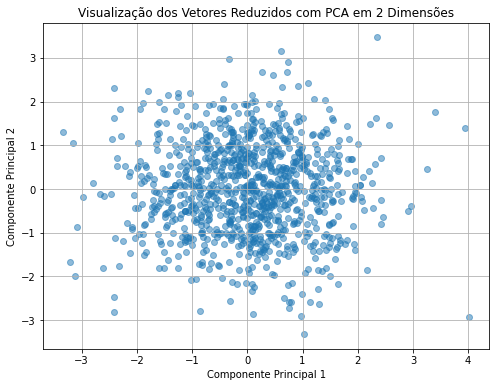

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Passo 2: Gere um conjunto de dados de exemplo com vetores de alta dimensão (d = 10)
np.random.seed(42)
n_samples = 1000
d = 10
X = np.random.randn(n_samples, d)  # Gera 1000 vetores de dimensão 10 com distribuição normal

# Passo 3: Aplique o PCA para reduzir a dimensionalidade dos vetores para 2 dimensões
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Passo 4: Plote os vetores reduzidos em um gráfico de dispersão para visualização
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5)
plt.title('Visualização dos Vetores Reduzidos com PCA em 2 Dimensões')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [22]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.76743473,
        -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, ...,  0.31424733,
        -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , ...,  0.37569802,
        -0.60063869, -0.29169375],
       ...,
       [-0.9125882 ,  0.70138989,  0.8452733 , ..., -0.90092112,
        -1.01268556, -1.75995888],
       [-0.44579531, -0.50372234,  0.52593728, ..., -1.77598225,
        -0.98094673, -0.77081363],
       [ 1.43362502,  0.19145072,  0.66216875, ..., -0.70531672,
         0.49576557,  0.64438845]])

In [23]:
X_2d

array([[-0.70732576,  0.4316153 ],
       [-0.32794935, -0.78891239],
       [ 0.24338461, -0.62239709],
       ...,
       [-1.77556364,  0.31805985],
       [-1.10572299, -1.44331578],
       [ 1.38589389, -1.07308135]])

PCA é comumente usada para reduzir a dimensão dos seus dados. Intuitivamente, o modelo colapsa os dados através dos componentes principais. Você pode pensar no primeiro componente principal (em um conjunto de dados 2D) como a linha onde há a maior quantidade de variância. Você pode então colapsar os pontos de dados nessa linha. Portanto, você passou de 2D para 1D. Você pode generalizar essa intuição para várias dimensões.

<img src="./imgs/pca3.png">

**Eigenvectors**: os vetores resultantes, também conhecidos como características não correlacionadas dos seus dados.

**Eigenvalues**: a quantidade de informação retida por cada nova característica. Você pode pensar nisso como a variância no vetor próprio.

Além disso, cada autovalor tem um vetor próprio correspondente. O autovalor informa quanto variância há no vetor próprio. Aqui estão os passos necessários para calcular a PCA:

Passos para Calcular a PCA:

<img src="./imgs/pca4.png">

1. Normalizar a média dos seus dados.
2. Calcular a matriz de covariância.
3. Calcular SVD na sua matriz de covariância. Isso retorna $[USV] = \text{svd}(\Sigma)$. As três matrizes U, S, V são desenhadas acima. U é rotulado com os vetores próprios, e S é rotulado com os autovalores.

Você pode então usar as primeiras n colunas do vetor $U$, para obter seus novos dados multiplicando $XU[:,0:n]$.

# Week 4 - Machine Translation

## Objetivos de aprendizagem
- Gradient descent
- Approximate nearest neighbors
- Locality sensitive hashing
- Hash functions
- Hash tables
- K nearest neighbors
- Document search
- Machine translation
- Frobenius norm

## Transforming word vectors

Para transformar vetores de palavras de uma língua para outra na task de machine translation, precisamos obter uma matriz $R$, que para identificar os valores similares do idioma que queremos traduzir.

No exemplo abaixo, a palavra "chat" representa "cat" em francês, e podemos identificar o seu vetor após multiplicar a matriz do subconjunto de palavras em inglês pela matriz $R$ e identificar a matriz mais próxima utilizando similaridade de cosseno entre o resultado e todos os vetores em francês.

Observe que $X$ corresponde à matriz de vetores de palavras em inglês e $Y$ corresponde à matriz de vetores de palavras em francês. $R$ é a matriz de mapeamento.

Passos necessários para aprender $R$:

1. Inicialize $R$.
2. Para cada iteração:

    a. Calcule a perda $Loss = \lVert XR - Y \rVert_F$.
    
    b. Calcule o gradiente $g = \frac{dLoss}{dR}$.
    
    c. Atualize $R$: $R = R - \alpha * g$.

Aqui está um exemplo para mostrar como a norma de Frobenius funciona:

$\lVert A \rVert_F = \sqrt{(\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2)}$

Em resumo, você está fazendo uso do seguinte:

- $XR \approx Y$
- Minimizar $\lVert XR - Y \rVert_F^2$

<img src="./imgs/transforming_vectors1.png">

<img src="./imgs/transforming_vectors2.png">

## K-nearest neighbors

Após computar o output de $XR$, teremos um novo vetor transformado. Precisamos encontrar quais os vetores do idioma francês estão mais próximos do novo vetor transformado. E podemos fazer isso utilizando K-nearest neighbors

<img src="./imgs/knn.png">

O K-nearest neighbors (K-NN) é um algoritmo de aprendizado supervisionado utilizado para classificação e regressão. No contexto da identificação de vetores mais próximos, o K-NN é empregado como um algoritmo de **recuperação de informação (information retrieval)**, onde os "vizinhos mais próximos" referem-se aos vetores mais semelhantes aos vetores de consulta com base em alguma medida de distância. 

**Funcionamento do K-NN:**
1. **Treinamento**:
   - No treinamento do K-NN, os vetores de treinamento são armazenados sem nenhum processamento adicional. Cada vetor de treinamento é associado a uma classe ou rótulo no caso da classificação, ou a um valor no caso da regressão.

2. **Cálculo da Distância**:
   - Durante a fase de teste ou consulta, o K-NN calcula a distância entre o vetor de consulta e todos os vetores de treinamento. As distâncias mais comuns usadas incluem a distância euclidiana, a distância de Manhattan, a distância de Minkowski, entre outras.

3. **Seleção dos K-vizinhos mais próximos**:
   - Após o cálculo das distâncias, o K-NN seleciona os K vetores de treinamento mais próximos do vetor de consulta com base na medida de distância escolhida.

4. **Classificação ou Regressão**:
   - Para a classificação, o K-NN atribui a classe mais frequente entre os K vizinhos mais próximos ao vetor de consulta. No caso de regressão, o K-NN pode calcular a média ou a mediana dos valores associados aos K vizinhos mais próximos e atribuí-lo ao vetor de consulta.

**Utilização para Identificação de Vetores Mais Próximos:**
- **Recuperação de Informação**:
  - No contexto de identificar vetores mais próximos, o K-NN pode ser utilizado como um algoritmo de recuperação de informação. Dados um vetor de consulta e uma coleção de vetores, o K-NN pode encontrar os vetores mais semelhantes ao vetor de consulta com base na distância escolhida.

- **Sistemas de Recomendação**:
  - Em sistemas de recomendação, o K-NN pode ser usado para encontrar os itens mais semelhantes a um item de interesse com base em avaliações de usuários ou características dos itens.

- **Agrupamento de Dados**:
  - No agrupamento de dados, o K-NN pode ser utilizado para encontrar grupos de vetores que são próximos uns dos outros em termos de suas características.

**Exemplo:**
Suponha que temos um conjunto de dados de vetores de features que representam produtos em um site de compras online. Cada vetor contém informações como preço, categoria, avaliação dos usuários, etc. Para identificar os produtos mais similares a um produto de consulta, podemos usar o K-NN da seguinte forma:

- Calculamos a distância entre o vetor de consulta (representando o produto de interesse) e todos os vetores de produtos no conjunto de dados.
- Selecionamos os K produtos mais próximos com base na distância.
- Podemos então recomendar esses produtos ao usuário como itens similares ao produto de consulta.

O K-NN é uma técnica simples e poderosa que pode ser utilizada em diversas aplicações para identificar vetores mais próximos com base em alguma medida de distância, facilitando a recuperação de informação e a análise de dados.

## Hash tables and hash functions

Hash tables e hash functions são conceitos fundamentais em ciência da computação, utilizados para armazenar e acessar dados de forma eficiente.

**Hash Functions:**

Uma função de hash é uma função que mapeia dados de tamanho arbitrário para valores de tamanho fixo, geralmente uma sequência de números ou letras. O objetivo principal de uma função de hash é espalhar os dados de forma uniforme ao longo de um espaço de hash, minimizando colisões, ou seja, o mapeamento de diferentes dados para o mesmo valor de hash. Boas funções de hash têm as seguintes propriedades:

1. **Determinismo**: Para o mesmo dado de entrada, a função de hash sempre produz o mesmo valor de hash.
2. **Eficiência**: A função de hash deve ser rápida de calcular.
3. **Espalhamento Uniforme**: A função de hash deve distribuir os dados uniformemente pelo espaço de hash, minimizando colisões.

**Exemplo de Função de Hash:**

```python
def hash_function(data, size):
    # Exemplo simples de função de hash: soma dos códigos ASCII dos caracteres
    hash_value = sum(ord(char) for char in data) % size
    return hash_value
```

Neste exemplo, a função de hash calcula a soma dos códigos ASCII dos caracteres de uma string e, em seguida, aplica o módulo do tamanho da tabela hash para obter um valor de hash dentro do intervalo desejado.

**Hash Tables:**

Uma tabela hash (ou hash table) é uma estrutura de dados que utiliza funções de hash para armazenar e recuperar dados de forma eficiente. Consiste em um array (ou vetor) de "buckets" (ou "slots"), onde cada bucket é indexado por um valor de hash único. Os dados são armazenados na tabela hash usando seus valores de hash como chaves de acesso.

**Exemplo de Hash Table:**

```python
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
    
    def put(self, key, value):
        index = hash_function(key, self.size)
        self.table[index] = value
    
    def get(self, key):
        index = hash_function(key, self.size)
        return self.table[index]

# Exemplo de uso
hash_table = HashTable(10)
hash_table.put("apple", 5)
hash_table.put("banana", 8)

print(hash_table.get("apple"))  # Saída: 5
print(hash_table.get("banana"))  # Saída: 8
```

Neste exemplo, implementamos uma tabela hash simples em Python usando uma lista como o array de buckets. A função `put` insere um par chave-valor na tabela hash, calculando o índice usando a função de hash. A função `get` recupera o valor associado a uma chave específica, novamente usando a função de hash para encontrar o índice correto na tabela.

As tabelas hash são amplamente utilizadas em diversas aplicações, incluindo bancos de dados, caches, tabelas de espalhamento e muito mais, devido à sua eficiência na busca e inserção de dados.

No contexto de tradução automática (machine translation), as hash tables e hash functions podem ser utilizadas para diversos fins, como armazenamento de vocabulário, mapeamento de palavras ou frases para índices, gerenciamento de alinhamentos de palavras, entre outros. 

**Armazenamento de Vocabulário:**

**Hash Table**: Uma hash table pode ser usada para armazenar o vocabulário de um idioma. Cada palavra é mapeada para um índice único na hash table, que pode ser usado para referenciar a palavra em outras estruturas de dados.

**Hash Function**: A função de hash pode ser usada para mapear as palavras do vocabulário para índices na hash table. Idealmente, a função de hash distribuirá as palavras de forma uniforme na hash table.

**Exemplo**:
```python
# Criação de uma hash table para armazenar o vocabulário
vocab_hash = {}

# Adiciona palavras ao vocabulário com um índice único usando uma função de hash
def add_word_to_vocab(word):
    index = hash(word)  # Exemplo simples de função de hash
    vocab_hash[index] = word

# Adiciona algumas palavras ao vocabulário
add_word_to_vocab("hello")
add_word_to_vocab("world")

print(vocab_hash)
# Saída: {126423: 'hello', 168706908251269437: 'world'}
```

**Mapeamento de Palavras ou Frases para Índices:**

**Hash Table**: Uma hash table pode ser usada para mapear palavras ou frases para índices em um modelo de tradução automática. Isso pode ser útil para armazenar embeddings de palavras, probabilidades de tradução, ou outros dados relacionados à tradução.

**Hash Function**: A função de hash pode ser usada para mapear palavras ou frases para índices únicos na hash table.

**Exemplo**:
```python
# Criação de uma hash table para mapear palavras para índices
word_index_hash = {}

# Adiciona palavras ao mapeamento usando uma função de hash
def map_word_to_index(word):
    index = hash(word)  # Exemplo simples de função de hash
    word_index_hash[word] = index

# Mapeia algumas palavras para índices
map_word_to_index("hello")
map_word_to_index("world")

print(word_index_hash)
# Saída: {'hello': 126423, 'world': 168706908251269437}
```

**Gerenciamento de Alinhamentos de Palavras:**

**Hash Table**: Uma hash table pode ser usada para armazenar alinhamentos de palavras entre dois idiomas em um modelo de tradução automática. Cada palavra do idioma de origem é mapeada para uma lista de palavras alinhadas no idioma de destino.

**Hash Function**: A função de hash pode ser usada para mapear palavras de um idioma para listas de palavras alinhadas em outro idioma.

**Exemplo**:
```python
# Criação de uma hash table para armazenar alinhamentos de palavras
alignment_hash = {}

# Adiciona alinhamentos de palavras usando uma função de hash
def add_word_alignment(source_word, target_word):
    source_index = hash(source_word)  # Exemplo simples de função de hash
    if source_index not in alignment_hash:
        alignment_hash[source_index] = [target_word]
    else:
        alignment_hash[source_index].append(target_word)

# Adiciona alguns alinhamentos de palavras
add_word_alignment("hello", "bonjour")
add_word_alignment("hello", "salut")

print(alignment_hash)
# Saída: {126423: ['bonjour', 'salut']}
```

Esses são apenas alguns exemplos de como hash tables e hash functions podem ser utilizadas no contexto de tradução automática. Elas podem ser aplicadas de muitas outras maneiras, dependendo das necessidades específicas do sistema de tradução automática.

## Locality sensitive hashing

Local Sensitive Hashing (LSH) é uma técnica de hashing probabilística utilizada para encontrar itens semelhantes em grandes conjuntos de dados, especialmente em dados de alta dimensionalidade, como vetores de características. Ao contrário de hash functions tradicionais, que tentam minimizar colisões para preservar a integridade dos dados, LSH tenta maximizar colisões entre itens semelhantes, a fim de agrupá-los juntos.

**Funcionamento do LSH:**

1. **Divisão do Espaço de Hashing**:
   - O espaço de hash é dividido em várias regiões ou "buckets". Idealmente, itens semelhantes devem ser mapeados para os mesmos buckets com alta probabilidade.

2. **Funções de Hashing Locais**:
   - São utilizadas funções de hash específicas que são sensíveis à localidade, ou seja, que maximizam a probabilidade de colisão entre itens semelhantes. Essas funções podem ser projetadas de várias maneiras, como funções de projeção aleatórias ou funções sensíveis à distância.

3. **Agrupamento de Itens Semelhantes**:
   - Os itens do conjunto de dados são então mapeados para os buckets usando as funções de hash locais. Itens mapeados para os mesmos buckets são considerados candidatos a serem semelhantes.

4. **Comparação de Candidatos**:
   - Para cada item, apenas uma pequena fração dos itens no mesmo bucket é comparada para determinar os verdadeiros vizinhos mais próximos. Isso ajuda a reduzir o tempo de busca em grandes conjuntos de dados.

**Exemplo de Local Sensitive Hashing:**

Suponha que temos um conjunto de vetores de características que representam imagens em um banco de dados. Queremos encontrar imagens semelhantes a uma imagem de consulta específica usando LSH.

- **Divisão do Espaço de Hashing**: Dividimos o espaço de hash em regiões ou buckets.
- **Funções de Hashing Locais**: Definimos funções de hash que maximizam a probabilidade de colisão entre vetores de características semelhantes.
- **Agrupamento de Itens Semelhantes**: Mapeamos os vetores de características das imagens para os buckets usando as funções de hash locais.
- **Comparação de Candidatos**: Para cada imagem de consulta, comparamos apenas as imagens nos mesmos buckets para determinar os verdadeiros vizinhos mais próximos.

**Uso do LSH:**

- **Recuperação de Informação**: LSH é usado em sistemas de recomendação, pesquisa de similaridade em grandes conjuntos de dados, detecção de duplicatas e muito mais.
- **Mineração de Dados**: É utilizado em mineração de texto, mineração de imagens, mineração de grafos e outras aplicações de mineração de dados.
- **Análise de Big Data**: LSH é particularmente útil em análises de big data, onde a eficiência de busca é crucial devido ao grande volume de dados.

Em resumo, Local Sensitive Hashing é uma técnica eficaz para encontrar itens semelhantes em grandes conjuntos de dados, especialmente em dados de alta dimensionalidade, como vetores de características, ajudando a reduzir o tempo de busca e os requisitos computacionais.

Local Sensitive Hashing (LSH) pode ser aplicado no contexto de tradução automática de várias maneiras para facilitar a busca eficiente de traduções ou alinhamentos de frases semelhantes em grandes conjuntos de dados.

**1. Busca Eficiente de Traduções Alternativas:**

- **Aplicação**: Em tradução automática, é comum ter várias traduções possíveis para uma determinada frase de origem. LSH pode ser usado para indexar e recuperar traduções alternativas de forma eficiente.

- **Implementação**: As frases no idioma de origem e suas traduções correspondentes podem ser mapeadas para um espaço vetorial. Em seguida, LSH pode ser aplicado para agrupar traduções semelhantes em buckets. Isso permite uma busca rápida por traduções alternativas semelhantes à frase de origem.

**2. Alinhamento de Frases Semelhantes:**

- **Aplicação**: Em alinhamento de frases, é necessário encontrar frases semelhantes em dois idiomas diferentes. LSH pode ser usado para encontrar alinhamentos aproximados entre frases semelhantes.

- **Implementação**: As frases nos idiomas de origem e destino podem ser mapeadas para espaços vetoriais. Em seguida, LSH pode ser aplicado para agrupar frases semelhantes em cada idioma em buckets. Isso facilita a busca por frases aproximadamente alinhadas entre os dois idiomas.

**3. Identificação de Frases Parcialmente Correspondentes:**

- **Aplicação**: Em tradução automática, pode ser útil identificar partes de frases que correspondem parcialmente a outras frases em outro idioma. LSH pode ser usado para identificar frases parcialmente correspondentes de forma eficiente.

- **Implementação**: As partes das frases podem ser mapeadas para espaços vetoriais. Em seguida, LSH pode ser aplicado para agrupar partes de frases semelhantes em buckets. Isso permite a identificação eficiente de partes de frases que correspondem parcialmente a outras frases em outro idioma.

**Exemplo:**

Suponha que temos um conjunto de frases em inglês e suas traduções em francês. Queremos encontrar traduções alternativas para uma frase de origem específica usando LSH.

- **Passo 1**: Mapear frases para vetores de características.
- **Passo 2**: Aplicar LSH para agrupar frases semelhantes em buckets.
- **Passo 3**: Para uma frase de origem, recuperar traduções alternativas semelhantes das frases no mesmo bucket.

```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Exemplo de frases em inglês
english_sentences = ["hello", "goodbye", "thank you", "how are you", "what is your name"]

# Exemplo de traduções em francês
french_translations = ["bonjour", "au revoir", "merci", "comment vas-tu", "quel est ton nom"]

# Mapear frases para vetores de características usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(english_sentences)

# Aplicar LSH para agrupar frases semelhantes
lshf = NearestNeighbors(n_neighbors=10)
lshf.fit(X)

# Recuperar traduções alternativas para uma frase de origem específica
query = vectorizer.transform(["hello"])
neighbors = lshf.kneighbors(query, n_neighbors=3)

# Exibir traduções alternativas
for neighbor_index in neighbors[1][0]:
    print(french_translations[neighbor_index])
```

Este é um exemplo simples de como usar LSH no contexto de tradução automática para encontrar traduções alternativas para uma frase de origem específica. O LSH é aplicado para agrupar frases semelhantes em buckets, o que facilita a busca eficiente por traduções alternativas semelhantes.

## Multiple Planes

No contexto de Local Sensitive Hashing (LSH), a técnica de múltiplos planos é uma abordagem utilizada para aumentar a sensibilidade local do hashing, permitindo uma melhor discriminação entre itens semelhantes e não semelhantes. Essa técnica é comumente aplicada em tarefas de busca aproximada, onde o objetivo é agrupar itens semelhantes em buckets para facilitar a recuperação eficiente de vizinhos próximos.

**Funcionamento dos Múltiplos Planos:**

1. **Definição dos Planos**:
   - Os múltiplos planos são definidos como hiperplanos em um espaço de hash de alta dimensão. Cada plano é representado por um vetor de pesos que define a orientação e a localização do plano no espaço.

2. **Projeção dos Itens**:
   - Os itens a serem hashados são projetados nos múltiplos planos. Isso é feito calculando o produto interno entre o vetor de características do item e o vetor de pesos de cada plano.

3. **Geração dos Hash Values**:
   - Com base nas projeções, são gerados hash values para cada item em relação a cada plano. Dependendo do sinal do resultado da projeção, um bit é atribuído como 0 ou 1.

4. **Combinação dos Hash Values**:
   - Os hash values de cada plano são combinados para formar um hash final para cada item. Isso pode ser feito concatenando os hash values ou usando operações de bits, como XOR ou OR.

5. **Armazenamento nos Buckets**:
   - Com base no hash final, os itens são atribuídos a buckets específicos na hash table.

**Exemplo de Múltiplos Planos em LSH:**

Considere um problema de busca aproximada em que queremos agrupar documentos semelhantes em buckets usando LSH com múltiplos planos.

- **Definição dos Planos**: Os múltiplos planos são representados por vetores de pesos aleatórios.
- **Projeção dos Documentos**: Os vetores de características dos documentos são projetados nos múltiplos planos.
- **Geração dos Hash Values**: Com base nas projeções, são gerados hash values atribuindo 0 ou 1 dependendo do sinal das projeções.
- **Combinação dos Hash Values**: Os hash values de cada plano são combinados para formar o hash final de cada documento.
- **Armazenamento nos Buckets**: Com base no hash final, os documentos são atribuídos a buckets específicos na hash table.

**Exemplo de Implementação em Python:**

```python
import numpy as np

# Função para gerar vetores de pesos aleatórios para os planos
def generate_random_planes(num_planes, num_features):
    return np.random.randn(num_planes, num_features)

# Função para projetar um item nos planos e gerar hash values
def project_and_hash(item, planes):
    projections = np.dot(planes, item)
    hash_values = (projections >= 0).astype(int)  # Atribui 1 para projeções positivas e 0 para negativas
    return hash_values

# Exemplo de uso
num_planes = 5
num_features = 10
planes = generate_random_planes(num_planes, num_features)
item = np.random.randn(num_features)  # Exemplo de vetor de características de um item
hash_values = project_and_hash(item, planes)
print("Hash Values:", hash_values)
```

Neste exemplo, estamos gerando múltiplos planos aleatórios e projetando um vetor de características de um item nesses planos para gerar hash values. Os hash values são então combinados para formar um hash final para o item. Este hash final pode ser usado para atribuir o item a um bucket específico na hash table.

## Approximate nearest neighbors

Approximate Nearest Neighbors (ANN) é uma técnica usada para encontrar pontos que são aproximadamente os vizinhos mais próximos de um ponto de consulta em um conjunto de dados, em vez de encontrar os vizinhos mais próximos exatos. Isso é útil em cenários onde a exatidão total não é necessária, mas a eficiência computacional é crucial.

**Funcionamento do Approximate Nearest Neighbors (ANN):**

1. **Indexação do Conjunto de Dados**:
   - Antes de encontrar os vizinhos mais próximos, o conjunto de dados é indexado de uma maneira que facilite a busca eficiente. Isso pode ser feito usando estruturas de dados como árvores kd, hashing ou técnicas de redução de dimensionalidade, como PCA ou LSH.

2. **Busca Aproximada**:
   - Quando um ponto de consulta é recebido, o algoritmo de ANN busca no conjunto de dados para encontrar os pontos que são aproximadamente os vizinhos mais próximos do ponto de consulta. A busca é feita de uma maneira que prioriza a eficiência computacional sobre a precisão absoluta.

3. **Retorno dos Resultados**:
   - Os pontos que são aproximadamente os vizinhos mais próximos do ponto de consulta são retornados como resultados. Dependendo do método utilizado, a precisão dos resultados pode variar, mas geralmente é suficiente para muitos aplicativos.

**Exemplos de Aplicativos:**

1. **Sistemas de Recomendação**:
   - Em sistemas de recomendação, é comum usar ANN para encontrar itens semelhantes aos itens que um usuário já gostou. Isso permite recomendações rápidas, mesmo em grandes conjuntos de dados.

2. **Busca em Grandes Conjuntos de Dados**:
   - Em sistemas de busca, ANN pode ser usado para encontrar documentos ou imagens semelhantes a uma consulta do usuário em grandes conjuntos de dados.

3. **Processamento de Linguagem Natural (NLP)**:
   - Em NLP, ANN pode ser usado para encontrar frases ou documentos semelhantes a uma consulta do usuário, facilitando a recuperação de informações relevantes.

**Exemplo de Uso de ANN:**

Suponha que temos um conjunto de dados de vetores de características que representam imagens. Queremos encontrar imagens que são aproximadamente as mais semelhantes a uma imagem de consulta usando ANN.

- **Passo 1**: Indexar o conjunto de dados de imagens para facilitar a busca eficiente.
- **Passo 2**: Quando uma imagem de consulta é recebida, usar ANN para encontrar as imagens que são aproximadamente as mais semelhantes à imagem de consulta.
- **Passo 3**: Retornar as imagens encontradas como resultados.

```python
from sklearn.neighbors import NearestNeighbors

# Exemplo de conjunto de dados de imagens
X = ...  # Vetores de características das imagens

# Indexar o conjunto de dados de imagens
ann_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
ann_model.fit(X)

# Quando uma imagem de consulta é recebida
query_image = ...  # Vetor de características da imagem de consulta
distances, indices = ann_model.kneighbors([query_image])

# Retornar as imagens encontradas como resultados
similar_images = X[indices[0]]
print("Imagens aproximadamente mais semelhantes:", similar_images)
```

Neste exemplo, estamos usando a biblioteca scikit-learn para encontrar as imagens que são aproximadamente as mais semelhantes a uma imagem de consulta usando ANN. A busca é rápida e eficiente, mesmo em grandes conjuntos de dados de imagens.

No contexto de machine translation (tradução automática), o Approximate Nearest Neighbors (ANN) refere-se à técnica de encontrar traduções aproximadamente mais próximas de uma frase de origem específica em um conjunto de dados de pares de frases. Em vez de buscar exatamente a tradução mais próxima, o objetivo é encontrar traduções que sejam aproximadamente semelhantes à frase de origem de uma maneira eficiente em termos computacionais.

**Funcionamento do Approximate Nearest Neighbors (ANN) em Machine Translation:**

1. **Indexação do Conjunto de Dados**:
   - Antes de encontrar as traduções aproximadamente mais próximas, o conjunto de dados de pares de frases é indexado de uma forma que facilite a busca eficiente. Isso pode ser feito usando técnicas como hashing, LSH (Local Sensitive Hashing), ou outros métodos de indexação.

2. **Busca Aproximada**:
   - Quando uma frase de origem é recebida, o algoritmo de ANN busca no conjunto de dados para encontrar traduções que sejam aproximadamente as mais próximas da frase de origem. Isso é feito de uma maneira que prioriza a eficiência computacional sobre a precisão absoluta.

3. **Retorno dos Resultados**:
   - As traduções aproximadamente mais próximas da frase de origem são retornadas como resultados. Embora essas traduções possam não ser exatamente as mais próximas em termos de similaridade linguística, elas são consideradas aceitáveis para o contexto da aplicação.

**Exemplo de Aplicação de ANN em Machine Translation:**

Suponha que temos um conjunto de dados de pares de frases em inglês e francês. Queremos encontrar traduções aproximadamente mais próximas de uma frase de origem em inglês usando ANN.

- **Passo 1**: Indexar o conjunto de dados de pares de frases para facilitar a busca eficiente.
- **Passo 2**: Quando uma frase de origem em inglês é recebida, usar ANN para encontrar traduções aproximadamente mais próximas da frase de origem.
- **Passo 3**: Retornar as traduções aproximadamente mais próximas encontradas como resultados.

```python
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

# Exemplo de conjunto de dados de pares de frases em inglês e francês
english_sentences = ["hello", "goodbye", "thank you", "how are you", "what is your name"]
french_translations = ["bonjour", "au revoir", "merci", "comment vas-tu", "quel est ton nom"]

# Indexar o conjunto de dados de pares de frases
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(english_sentences)

# Usar ANN para encontrar traduções aproximadamente mais próximas
ann_model = NearestNeighbors(n_neighbors=1, algorithm='auto')
ann_model.fit(X)

# Quando uma frase de origem em inglês é recebida
query_sentence = "hello"
query_vector = vectorizer.transform([query_sentence])

# Encontrar a tradução aproximadamente mais próxima da frase de origem
distance, index = ann_model.kneighbors(query_vector)

# Retornar a tradução aproximadamente mais próxima encontrada
nearest_translation = french_translations[index[0][0]]
print("Tradução aproximadamente mais próxima:", nearest_translation)
```

Neste exemplo, estamos usando a biblioteca scikit-learn para encontrar a tradução aproximadamente mais próxima de uma frase de origem em inglês usando ANN. O processo é rápido e eficiente, mesmo em grandes conjuntos de dados de pares de frases.

**Explicação**:

**1. Indexação das Frases em Inglês**: Usamos a classe TfidfVectorizer do scikit-learn para converter as frases em inglês em vetores de características. Esses vetores representam a "assinatura" de cada frase em inglês com base na frequência dos termos.

**2. Aplicação de ANN aos Vetores de Características**: A classe NearestNeighbors é usada para aplicar a técnica de ANN aos vetores de características das frases em inglês. Isso cria uma estrutura de dados que facilita a busca eficiente por traduções aproximadamente mais próximas.

**3. Consulta com uma Frase em Inglês**: Quando uma nova frase em inglês é recebida como consulta, ela também é transformada em um vetor de características usando o mesmo TfidfVectorizer.

**4. Busca pela Tradução Aproximadamente Mais Próxima**: Usando a classe NearestNeighbors, buscamos a tradução aproximadamente mais próxima da frase de origem em inglês. A busca é feita no conjunto de dados indexado de vetores de características das frases em inglês, não diretamente nas traduções em francês.

**5. Recuperação da Tradução Correspondente**: Depois de encontrar o índice da tradução aproximadamente mais próxima, podemos usar esse índice para acessar a lista french_translations e recuperar a tradução correspondente em francês.

As traduções em francês não são explicitamente indexadas para a aplicação de ANN. Em vez disso, a busca é realizada nos vetores de características das frases em inglês, e a tradução correspondente é recuperada usando o índice encontrado. Isso permite uma busca eficiente por traduções aproximadamente mais próximas sem a necessidade de indexar separadamente as traduções em francês.

# Referência
- Natural Language Processing with Classification and Vector Spaces, disponível em https://www.coursera.org/learn/classification-vector-spaces-in-nlp

# Licença
- CC BY-SA 2.0 LEGAL CODE. Attribution-ShareAlike 2.0 Generic
- Para detalhes sobre a licença, verifique https://creativecommons.org/licenses/by-sa/2.0/legalcode

In [42]:
import numpy as np

# Definir a matriz A
A = np.array([[1, 3],
              [4, 5]])

# Calcular a norma de Frobenius
norma_frobenius = np.linalg.norm(A, 'fro')

print("A norma de Frobenius de A é:", norma_frobenius)

A norma de Frobenius de A é: 7.14142842854285
